In [ ]:
biom convert -i /Users/dimitriosgiakoumas/Downloads/PERM/ASV_Table.tsv -o /Users/dimitriosgiakoumas/Downloads/PERM/ASV_Table.biom --to-hdf5 --table-type="OTU table"

qiime tools import \
    --type 'FeatureTable[Frequency]' \
           --input-path /Users/dimitriosgiakoumas/Downloads/PERM/ASV_Table.biom \
           --output-path /Users/dimitriosgiakoumas/Downloads/PERM/feature-table.qza

qiime diversity beta \
                --i-table /Users/dimitriosgiakoumas/Downloads/PERM/feature-table.qza \
                --p-metric braycurtis \
                           --o-distance-matrix /Users/dimitriosgiakoumas/Downloads/PERM/bray-curtis-matrix.qza

qiime feature-table relative-frequency \
                    --i-table /Users/dimitriosgiakoumas/Downloads/PERM/feature-table.qza \
                    --o-relative-frequency-table /Users/dimitriosgiakoumas/Downloads/PERM/feature-table-relative.qza

qiime diversity pcoa-biplot \
                --i-pcoa /Users/dimitriosgiakoumas/Downloads/PERM/bray-curtis-pcoa.qza \
                --i-features /Users/dimitriosgiakoumas/Downloads/PERM/feature-table-relative.qza \
                --o-biplot /Users/dimitriosgiakoumas/Downloads/PERM/bray-curtis-biplot.qza

qiime diversity biplot \
                --i-pcoa /Users/dimitriosgiakoumas/Downloads/PERM/bray-curtis-pcoa.qza \
                --i-table /Users/dimitriosgiakoumas/Downloads/PERM/feature-table.qza \
                --m-sample-metadata-file /Users/dimitriosgiakoumas/Downloads/PERM/Metadata.tsv \
                --o-biplot /Users/dimitriosgiakoumas/Downloads/PERM/bray-curtis-biplot.qza

qiime emperor plot \
              --i-pcoa /Users/dimitriosgiakoumas/Downloads/PERM/bray-curtis-pcoa.qza \
              --m-metadata-file /Users/dimitriosgiakoumas/Downloads/PERM/Metadata.tsv \
              --o-visualization /Users/dimitriosgiakoumas/Downloads/PERM/bray-curtis-pcoa-emperor.qzv

qiime tools export \
            --input-path /Users/dimitriosgiakoumas/Downloads/PERM/bray-curtis-biplot.qza \
            --output-path /Users/dimitriosgiakoumas/Downloads/PERM/exported-bray-curtis-biplot



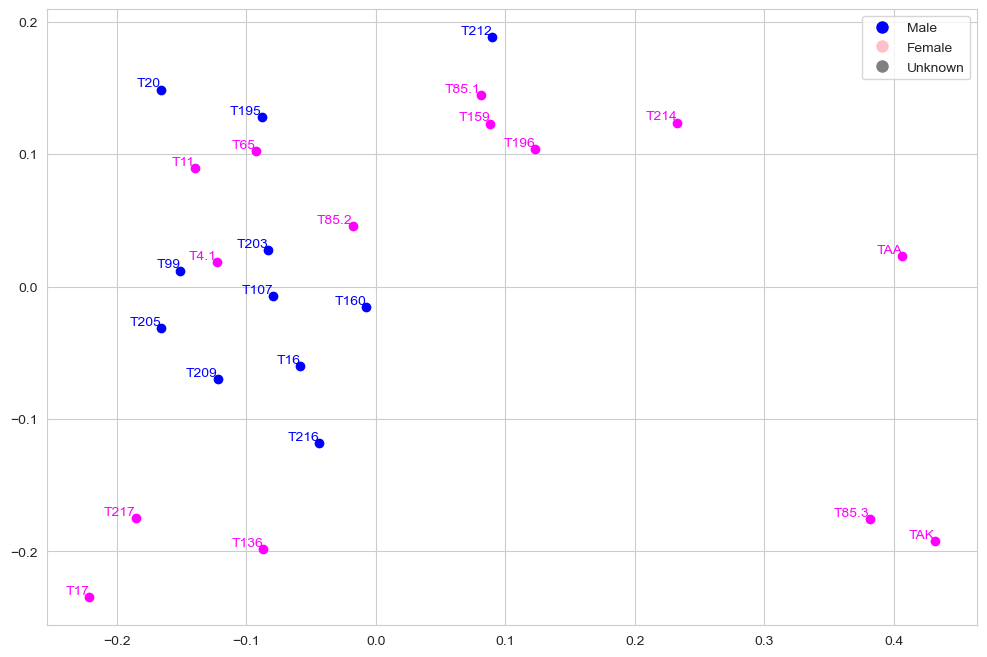

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Given data for loadings and samples remains unchanged

# Correct metadata for 'Sex'
sex_metadata = {
    'T20': 'M', 'T107': 'M', 'T203': 'M', 'T11': 'F', 'T212': 'M', 'T85.1': 'F',
    'T65': 'F', 'T196': 'F', 'T99': 'M', 'T85.2': 'F', 'TAK': 'F', 'T85.3': 'F',
    'T195': 'M', 'T205': 'M', 'T159': 'F', 'TAA': 'F', 'T160': 'M', 'T4.1': 'F',
    'T214': 'F', 'T215': 'Ukn', 'T216': 'M', 'T209': 'M', 'T136': 'F', 'T16': 'M',
    'T17': 'F', 'T217': 'F'
}

# Assign colors based on 'Sex', including 'Ukn' for T215
colors = []
for site in samples['Site']:
    sex = sex_metadata.get(site, "N/A")  # Get the sex from the metadata, default to "N/A" if not found
    color = color_map.get(sex, 'black')  # Get the corresponding color, default to 'black'
    colors.append(color)
    if site == 'T215':  # Check if the current site is T215
        print(f"T215 color: {color}")  # Print the color for debugging


# Make sure to use 'colors' for plotting the points and annotations
# Convert to numpy arrays for easier manipulation remains unchanged

# Given percentage variance for each PC remains unchanged

# Plotting the biplot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot samples as points
for i, site in enumerate(samples['Site']):
    ax.scatter(samples_pc1[i], samples_pc2[i], color=colors[i], label=f'{site} ({sex_metadata.get(site, "N/A")})')

# Plot loadings as vectors remains unchanged

# Annotate samples
for i, txt in enumerate(samples['Site']):
    ax.text(samples_pc1[i], samples_pc2[i], txt, color=colors[i], ha='right', va='bottom')

# Set labels and title remains unchanged

# Create a legend for Male, Female, and Unknown
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Male', markersize=10, markerfacecolor='blue'),
    Line2D([0], [0], marker='o', color='w', label='Female', markersize=10, markerfacecolor='pink'),
    Line2D([0], [0], marker='o', color='w', label='Unknown', markersize=10, markerfacecolor='gray')
]

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='upper right')

# Show the plot
plt.show()


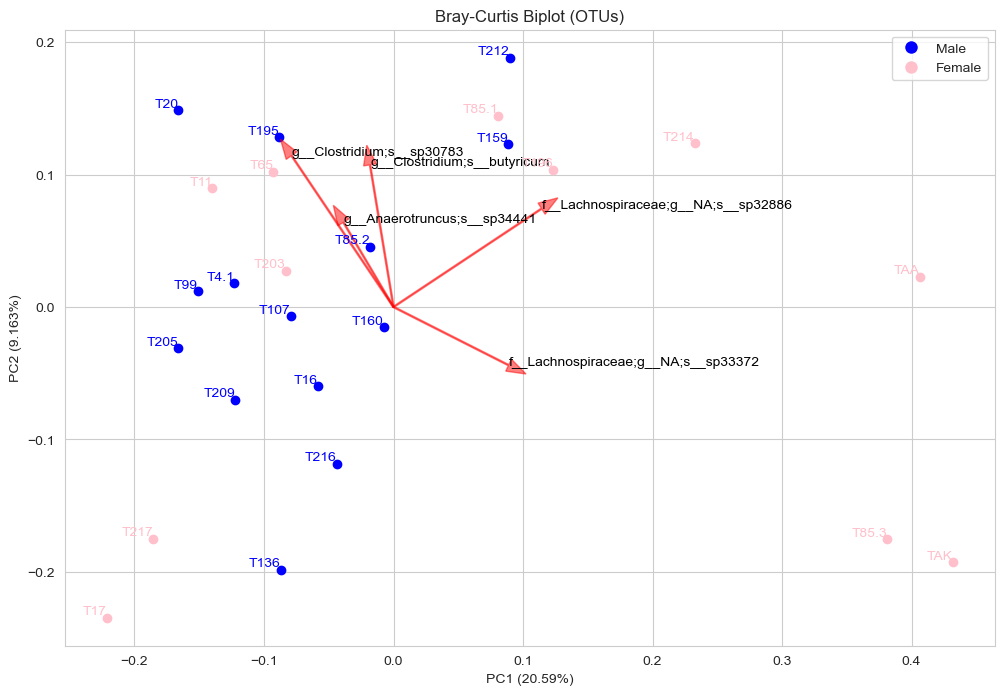

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Updated loadings with taxonomy data
loadings = {
    'taxonomy': [
        'g__Anaerotruncus;s__sp34441',
        'g__Clostridium;s__butyricum',
        'f__Lachnospiraceae;g__NA;s__sp33372',
        'g__Clostridium;s__sp30783',
        'f__Lachnospiraceae;g__NA;s__sp32886'
    ],
    'PC1': [-0.0386915, -0.0181386, 0.08886141, -0.0787484, 0.11434996],
    'PC2': [0.06393981, 0.10735483, -0.0439455, 0.11429772, 0.07424388]
}

# Provided sample data
samples = {
    'Site': ['T159', 'T136', 'T16', 'T17', 'T11', 'T205', 'T209', 'T99', 'T107', 'T203',
             'TAA', 'TAK', 'T160', 'T4.1', 'T20', 'T214', 'T217', 'T216', 'T212', 'T65',
             'T195', 'T196', 'T85.2', 'T85.3', 'T85.1'],
    'PC1': [0.088424459, -0.087083212, -0.058345497, -0.221195732, -0.139786938, -0.166067617,
            -0.122075271, -0.15120632, -0.079338291, -0.083259956, 0.406312983, 0.431643148,
            -0.007650314, -0.123059654, -0.16628776, 0.232694381, -0.185451647, -0.043950995,
            0.089698157, -0.092910591, -0.088239354, 0.123061833, -0.017942797, 0.381130771,
            0.080886216],
    'PC2': [0.123017248, -0.198356088, -0.060009363, -0.234618556, 0.089494945, -0.031308774,
            -0.069964296, 0.011918052, -0.007022335, 0.02740614, 0.022982969, -0.192407168,
            -0.015448889, 0.018227141, 0.148751078, 0.123763591, -0.174969254, -0.118402238,
            0.188217637, 0.102259932, 0.128004995, 0.103811336, 0.045578899, -0.175433473,
            0.144506471]
}

# Manually input metadata
manual_metadata = {
    'Site': ['T159', 'T136', 'T16', 'T17', 'T11', 'T205', 'T209', 'T99', 'T107', 'T203',
             'TAA', 'TAK', 'T160', 'T4.1', 'T20', 'T214', 'T217', 'T216', 'T212', 'T65',
             'T195', 'T196', 'T85.2', 'T85.3', 'T85.1'],
    'Sex': ['M', 'M', 'M', 'F', 'F', 'M', 'M', 'M', 'M', 'F',
            'F', 'F', 'M', 'M', 'M', 'F', 'F', 'M', 'M', 'F',
            'M', 'F', 'M', 'F', 'F']
}

# Map 'Sex' to colors
color_map = {'M': 'blue', 'F': 'pink'}
colors = [color_map[sex] for sex in manual_metadata['Sex']]

# Convert to numpy arrays for easier manipulation
loadings_pc1 = np.array(loadings['PC1'])
loadings_pc2 = np.array(loadings['PC2'])
samples_pc1 = np.array(samples['PC1'])
samples_pc2 = np.array(samples['PC2'])

# Given percentage variance for each PC
pc1_variance = 20.59  # PC1 variance percentage
pc2_variance = 9.163  # PC2 variance percentage

# Plotting the biplot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot samples as points
for i in range(len(samples_pc1)):
    ax.scatter(samples_pc1[i], samples_pc2[i], color=colors[i], label=f'{samples["Site"][i]} ({manual_metadata["Sex"][i]})')

# Plot loadings as vectors
for i, txt in enumerate(loadings['taxonomy']):
    ax.arrow(0, 0, loadings_pc1[i], loadings_pc2[i], color='red', alpha=0.5, head_width=0.01)
    ax.text(loadings_pc1[i], loadings_pc2[i], txt, color='black')

# Annotate samples
for i, txt in enumerate(samples['Site']):
    ax.text(samples_pc1[i], samples_pc2[i], txt, color=colors[i], ha='right', va='bottom')

ax.set_xlabel(f'PC1 ({pc1_variance}%)')
ax.set_ylabel(f'PC2 ({pc2_variance}%)')
ax.set_title('Bray-Curtis Biplot (OTUs)')
ax.grid(True)

# Create a legend for male and female
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Male', markersize=10, markerfacecolor='blue'),
                   Line2D([0], [0], marker='o', color='w', label='Female', markersize=10, markerfacecolor='pink')]
ax.legend(handles=legend_elements, loc='upper right')

# Display the plot
plt.show()


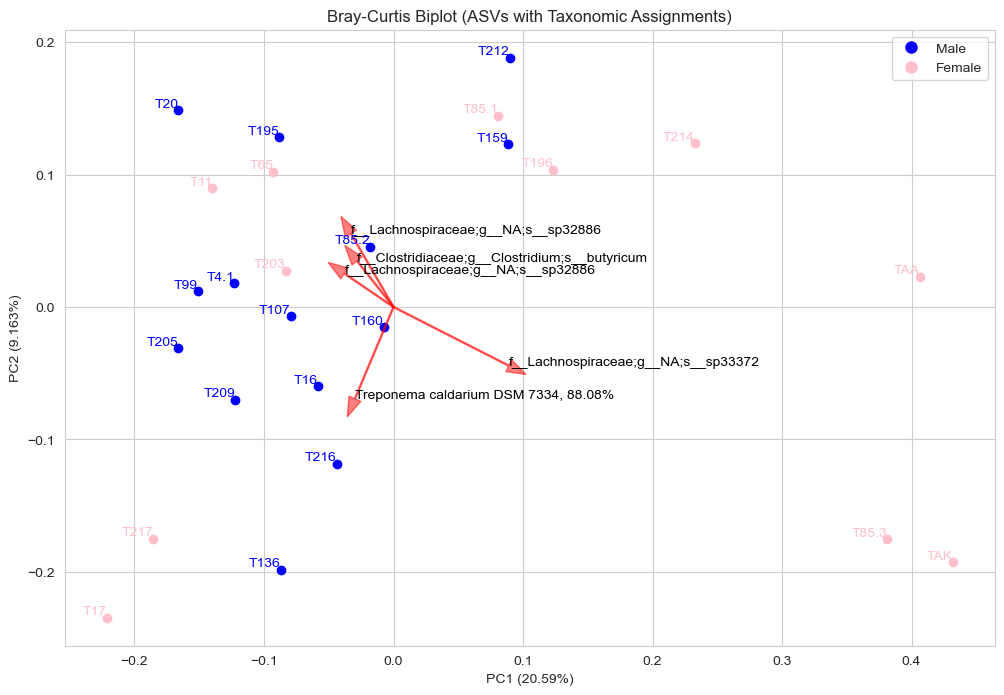

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Updated loadings with sequences 2, 3, 4, 8 and 13 as per user request
loadings = {
    'seq': ['f__Lachnospiraceae;g__NA;s__sp32886', 'f__Clostridiaceae;g__Clostridium;s__butyricum', 'Treponema caldarium DSM 7334, 88.08%', 'f__Lachnospiraceae;g__NA;s__sp33372', 'f__Lachnospiraceae;g__NA;s__sp32886'],
    'PC1': [-0.037968022, -0.028180197, -0.029762223, 0.088978431, -0.032933484],
    'PC2': [0.025320453, 0.034811183, -0.069247813, -0.044288783, 0.055472628]
}

# Provided sample data
samples = {
    'Site': ['T159', 'T136', 'T16', 'T17', 'T11', 'T205', 'T209', 'T99', 'T107', 'T203',
             'TAA', 'TAK', 'T160', 'T4.1', 'T20', 'T214', 'T217', 'T216', 'T212', 'T65',
             'T195', 'T196', 'T85.2', 'T85.3', 'T85.1'],
    'PC1': [0.088424459, -0.087083212, -0.058345497, -0.221195732, -0.139786938, -0.166067617,
            -0.122075271, -0.15120632, -0.079338291, -0.083259956, 0.406312983, 0.431643148,
            -0.007650314, -0.123059654, -0.16628776, 0.232694381, -0.185451647, -0.043950995,
            0.089698157, -0.092910591, -0.088239354, 0.123061833, -0.017942797, 0.381130771,
            0.080886216],
    'PC2': [0.123017248, -0.198356088, -0.060009363, -0.234618556, 0.089494945, -0.031308774,
            -0.069964296, 0.011918052, -0.007022335, 0.02740614, 0.022982969, -0.192407168,
            -0.015448889, 0.018227141, 0.148751078, 0.123763591, -0.174969254, -0.118402238,
            0.188217637, 0.102259932, 0.128004995, 0.103811336, 0.045578899, -0.175433473,
            0.144506471]
}

# Manually input metadata
manual_metadata = {
    'Site': ['T159', 'T136', 'T16', 'T17', 'T11', 'T205', 'T209', 'T99', 'T107', 'T203',
             'TAA', 'TAK', 'T160', 'T4.1', 'T20', 'T214', 'T217', 'T216', 'T212', 'T65',
             'T195', 'T196', 'T85.2', 'T85.3', 'T85.1'],
    'Sex': ['M', 'M', 'M', 'F', 'F', 'M', 'M', 'M', 'M', 'F',
            'F', 'F', 'M', 'M', 'M', 'F', 'F', 'M', 'M', 'F',
            'M', 'F', 'M', 'F', 'F']
}

# Map 'Sex' to colors
color_map = {'M': 'blue', 'F': 'pink'}
colors = [color_map[sex] for sex in manual_metadata['Sex']]

# Convert to numpy arrays for easier manipulation
loadings_pc1 = np.array(loadings['PC1'])
loadings_pc2 = np.array(loadings['PC2'])
samples_pc1 = np.array(samples['PC1'])
samples_pc2 = np.array(samples['PC2'])

# Given percentage variance for each PC
pc1_variance = 20.59  # PC1 variance percentage
pc2_variance = 9.163  # PC2 variance percentage

# Plotting the biplot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot samples as points
for i in range(len(samples_pc1)):
    ax.scatter(samples_pc1[i], samples_pc2[i], color=colors[i], label=f'{samples["Site"][i]} ({manual_metadata["Sex"][i]})')

# Plot loadings as vectors
for i, txt in enumerate(loadings['seq']):
    ax.arrow(0, 0, loadings_pc1[i], loadings_pc2[i], color='red', alpha=0.5, head_width=0.01)
    ax.text(loadings_pc1[i], loadings_pc2[i], txt, color='black')

# Annotate samples
for i, txt in enumerate(samples['Site']):
    ax.text(samples_pc1[i], samples_pc2[i], txt, color=colors[i], ha='right', va='bottom')

ax.set_xlabel(f'PC1 ({pc1_variance}%)')
ax.set_ylabel(f'PC2 ({pc2_variance}%)')
ax.set_title('Bray-Curtis Biplot (ASVs with Taxonomic Assignments)')
ax.grid(True)

# Create a legend for male and female
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Male', markersize=10, markerfacecolor='blue'),
                   Line2D([0], [0], marker='o', color='w', label='Female', markersize=10, markerfacecolor='pink')]
ax.legend(handles=legend_elements, loc='upper right')

# Display the plot
plt.show()


In [15]:

seq2

k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__NA;s__sp32886

seq3

k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae;g__Clostridium;s__butyricum

seq8

k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__NA;s__sp33372

seq11

k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__NA;g__NA;s__sp30555

seq15

k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Anaerotruncus;s__sp34441



NameError: name 'seq2' is not defined

KeyError: 'JuvF'

IndexError: index 25 is out of bounds for axis 0 with size 25

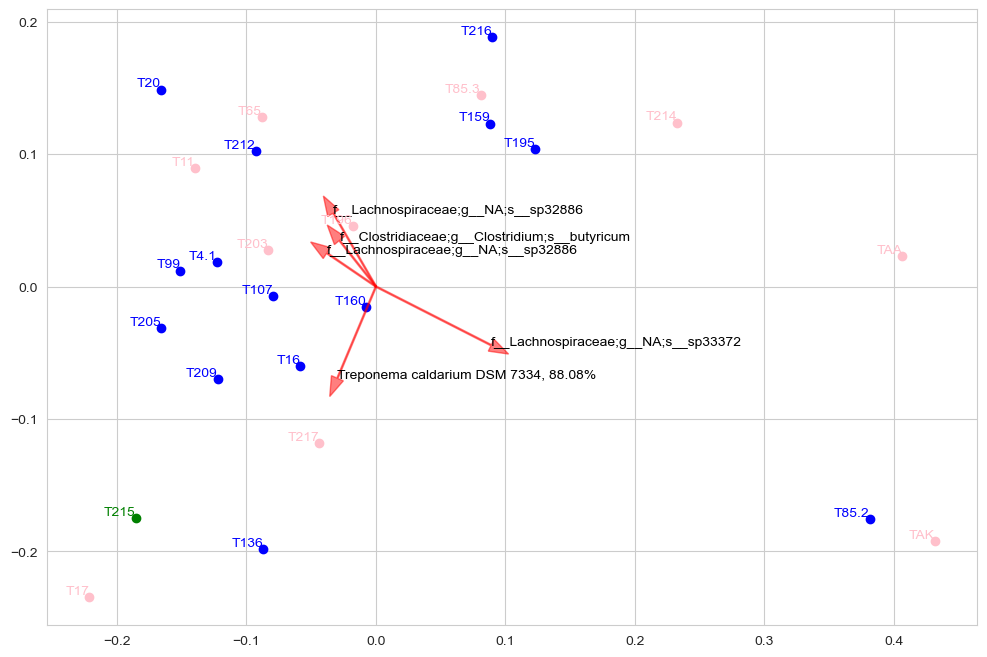

In [18]:
print('hello')

hello


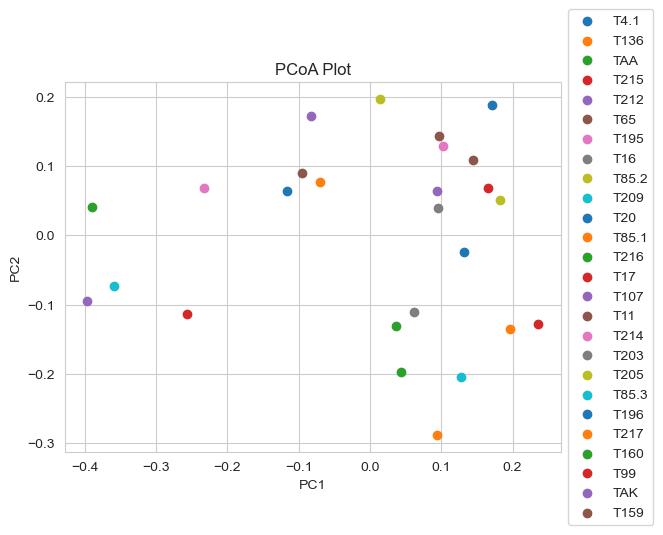

In [20]:
!python --version

Python 3.10.14


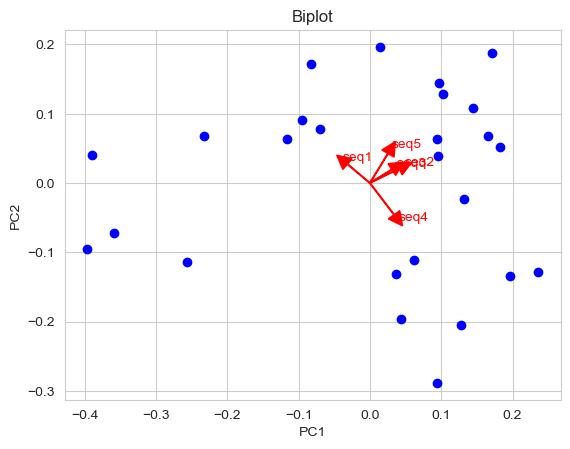

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# PCoA coordinates for the samples
pcoa_coordinates = np.array([
    (0.132106749, -0.023656197), (0.09404186, -0.288623279), (-0.389497192, 0.040953498),
    (-0.256575123, -0.113811878), (-0.082341681, 0.172045703), (0.097590776, 0.143986013),
    (0.102169137, 0.128535497), (0.062445352, -0.11048377), (0.01378371, 0.196425248),
    (0.12794519, -0.205157323), (0.170559476, 0.18755697), (-0.069767919, 0.077453388),
    (0.043556109, -0.196798057), (0.236005444, -0.127880975), (0.094771858, 0.063551467),
    (0.144339019, 0.108902169), (-0.233144172, 0.068326168), (0.095194372, 0.039048842),
    (0.183110815, 0.051683046), (-0.358289828, -0.072648901), (-0.116054987, 0.063318336),
    (0.196996673, -0.134669679), (0.036989475, -0.13113694), (0.165249179, 0.067803811),
    (-0.396046009, -0.095244776), (-0.095138285, 0.09052162)
])

# Loadings for the features
feature_loadings = np.array([
    [-0.031340785, 0.027133285],
    [0.040867346, 0.020660044],
    [0.03072566, 0.019361335],
    [0.033892768, -0.045804456],
    [0.025381725, 0.042506814]
])

# Sample and feature names
sample_names = ['T4.1', 'T136', 'TAA', 'T215', 'T212', 'T65', 'T195', 'T16', 'T85.2', 'T209',
                'T20', 'T85.1', 'T216', 'T17', 'T107', 'T11', 'T214', 'T203', 'T205', 'T85.3',
                'T196', 'T217', 'T160', 'T99', 'TAK', 'T159']  # Add more if needed
feature_names = ['seq1', 'seq2', 'seq3', 'seq4', 'seq5']

# Create the biplot
fig, ax = plt.subplots()

# Plot the samples
ax.scatter(pcoa_coordinates[:, 0], pcoa_coordinates[:, 1], color='blue', label='Samples')

# Plot the feature loadings
for i, (x, y) in enumerate(feature_loadings):
    ax.arrow(0, 0, x, y, color='red', head_width=0.02, head_length=0.02)
    ax.text(x*1.2, y*1.2, feature_names[i], color='red')

# Label the axes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Biplot')

# Show the plot
plt.show()


In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming previous variables (samples, loadings, _metadata) are defined here

# Map Site to Sex with full descriptions
site_to_sex_full = {
    site: ('Male' if sex == 'M' else 'Female' if sex == 'F' else 'Juvenile')
    for site, sex in zip(_metadata['Site'], _metadata['Sex'])
}

# Assign colors based on the full description
colors = {'Male': 'blue', 'Female': 'red', 'Juvenile': 'green'}

# Convert data to numpy arrays for plotting
sample_coords = np.column_stack((samples['PC1'], samples['PC2']))
sex_colors = [colors[site_to_sex_full[site]] for site in samples['Site']]

# Create the biplot with updated figure size
fig, ax = plt.subplots(figsize=(12, 8))

# Plot samples with colors based on sex, using full descriptions for labels
for i, (x, y) in enumerate(sample_coords):
    ax.scatter(x, y, color=sex_colors[i], label=site_to_sex_full[samples['Site'][i]] if samples['Site'][i] in _metadata['Site'] else "")
    ax.annotate(samples['Site'][i], (x, y), fontsize=8)

# Handle legend: avoid duplicate labels and move it outside
handles, labels = plt.gca().get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
ax.legend(*zip(*unique), loc='upper left', bbox_to_anchor=(1, 1))

# Plot updated loadings as vectors
for i, seq in enumerate(loadings['seq']):
    plt.arrow(0, 0, loadings['PC1'][i], loadings['PC2'][i], color='r', alpha=0.5, head_width=0.01, head_length=0.01)
    plt.text(loadings['PC1'][i] * 1.2, loadings['PC2'][i] * 1.2, seq, color='r', ha='center', va='center')

# Update axes labels to include PCoA percentages
ax.set_xlabel('PCoA1 (19.87%)')
ax.set_ylabel('PCoA2 (10.01%)')
ax.set_title('Bray-Curtis PCoA Biplot (ASV) with Sex Metadata')

# Adjust layout to make room for the legend outside the plot
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Display the plot
plt.show()

NameError: name '_metadata' is not defined

In [23]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import skbio
import plotly

print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("Scikit-bio version:", skbio.__version__)
print("Plotly version:", plotly.__version__)


NumPy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.8.4
Seaborn version: 0.10.1
Scikit-bio version: 0.6.0
Plotly version: 5.21.0


In [24]:
!pip install seaborn

In [25]:
import sys
print(sys.executable)


/Users/dimitriosgiakoumas/mambaforge/bin/python3.10


In [26]:
# Activate your mambaforge environment
source /Users/dimitriosgiakoumas/mambaforge/bin/activate


NameError: name 'source' is not defined

In [27]:
!pip install source

In [28]:
# Check the Python executable path
import sys
print("Python executable path:", sys.executable)

# Install seaborn if not already installed
!pip install seaborn

# Import seaborn to verify the installation
import seaborn as sns
print("Seaborn version:", sns.__version__)


Python executable path: /Users/dimitriosgiakoumas/mambaforge/bin/python3.10
Seaborn version: 0.10.1


In [29]:
!/usr/local/bin/python3.9 -m pip show seaborn



Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages
Requires: matplotlib, numpy, pandas
Required-by: 


Number of sites: 26
Number of sexes: 26


IndexError: index 25 is out of bounds for axis 0 with size 25

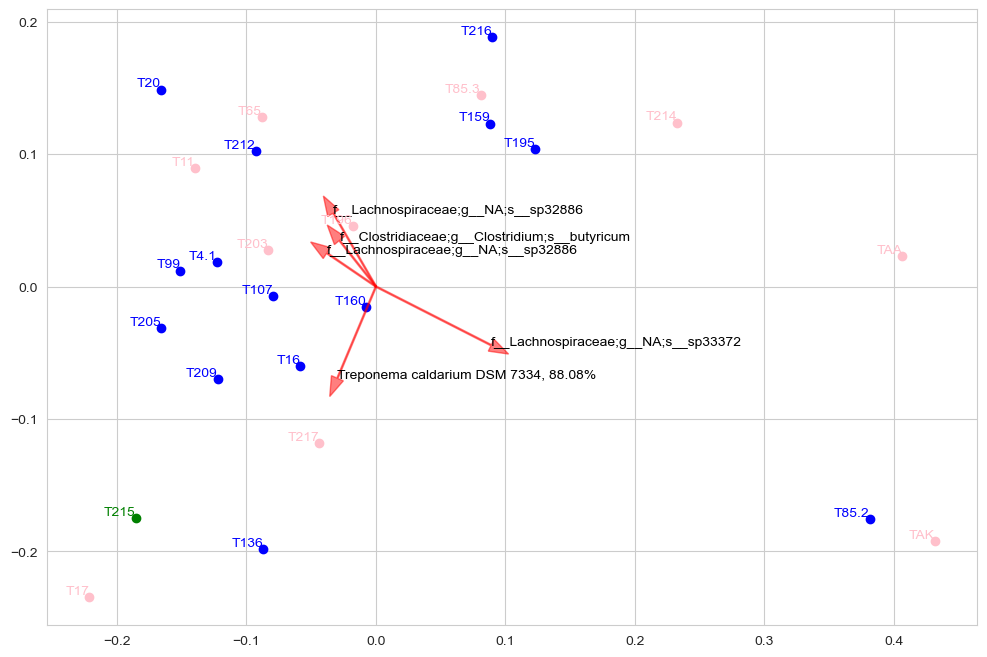

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Updated loadings with sequences 2, 3, 8, 11, and 15 as per user request
loadings = {
    'seq': ['f__Lachnospiraceae;g__NA;s__sp32886', 'f__Clostridiaceae;g__Clostridium;s__butyricum', 'Treponema caldarium DSM 7334, 88.08%', 'f__Lachnospiraceae;g__NA;s__sp33372', 'f__Lachnospiraceae;g__NA;s__sp32886'],
    'PC1': [-0.037968022, -0.028180197, -0.029762223, 0.088978431, -0.032933484],
    'PC2': [0.025320453, 0.034811183, -0.069247813, -0.044288783, 0.055472628]
}

# Provided sample data
samples = {
    'Site': ['T159', 'T136', 'T16', 'T17', 'T11', 'T205', 'T209', 'T99', 'T107', 'T203',
             'TAA', 'TAK', 'T160', 'T4.1', 'T20', 'T214', 'T215', 'T217', 'T216', 'T212', 'T65',
             'T195', 'T196', 'T85.2', 'T85.3', 'T85.1'],
    'PC1': [0.088424459, -0.087083212, -0.058345497, -0.221195732, -0.139786938, -0.166067617,
            -0.122075271, -0.15120632, -0.079338291, -0.083259956, 0.406312983, 0.431643148,
            -0.007650314, -0.123059654, -0.16628776, 0.232694381, -0.185451647, -0.043950995,
            0.089698157, -0.092910591, -0.088239354, 0.123061833, -0.017942797, 0.381130771,
            0.080886216],
    'PC2': [0.123017248, -0.198356088, -0.060009363, -0.234618556, 0.089494945, -0.031308774,
            -0.069964296, 0.011918052, -0.007022335, 0.02740614, 0.022982969, -0.192407168,
            -0.015448889, 0.018227141, 0.148751078, 0.123763591, -0.174969254, -0.118402238,
            0.188217637, 0.102259932, 0.128004995, 0.103811336, 0.045578899, -0.175433473,
            0.144506471]
}

# Manually input metadata
manual_metadata = {
    'Site': ['T159', 'T136', 'T16', 'T17', 'T11', 'T205', 'T209', 'T99', 'T107', 'T203',
             'TAA', 'TAK', 'T160', 'T4.1', 'T20', 'T214', 'T215', 'T217', 'T216', 'T212', 'T65',
             'T195', 'T196', 'T85.2', 'T85.3', 'T85.1'],
    'Sex': ['M', 'M', 'M', 'F', 'F', 'M', 'M', 'M', 'M', 'F',
            'F', 'F', 'M', 'M', 'M', 'F', 'Juv.', 'F', 'M', 'M', 'F',
            'M', 'F', 'M', 'F', 'F']
}

# Check the lengths of lists
print(f"Number of sites: {len(samples['Site'])}")
print(f"Number of sexes: {len(manual_metadata['Sex'])}")

# Ensure lengths match
assert len(samples['Site']) == len(manual_metadata['Sex']), "Mismatch in number of sites and sexes"

# Map 'Sex' to colors
color_map = {'M': 'blue', 'F': 'pink', 'Juv.': 'green'}
colors = [color_map[sex] for sex in manual_metadata['Sex']]

# Convert to numpy arrays for easier manipulation
loadings_pc1 = np.array(loadings['PC1'])
loadings_pc2 = np.array(loadings['PC2'])
samples_pc1 = np.array(samples['PC1'])
samples_pc2 = np.array(samples['PC2'])

# Given percentage variance for each PC
pc1_variance = 20.59  # PC1 variance percentage
pc2_variance = 9.163  # PC2 variance percentage

# Plotting the biplot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot samples as points
for i in range(len(samples_pc1)):
    ax.scatter(samples_pc1[i], samples_pc2[i], color=colors[i], label=f'{samples["Site"][i]} ({manual_metadata["Sex"][i]})')

# Plot loadings as vectors
for i, txt in enumerate(loadings['seq']):
    ax.arrow(0, 0, loadings_pc1[i], loadings_pc2[i], color='red', alpha=0.5, head_width=0.01)
    ax.text(loadings_pc1[i], loadings_pc2[i], txt, color='black')

# Annotate samples
for i, txt in enumerate(samples['Site']):
    ax.text(samples_pc1[i], samples_pc2[i], txt, color=colors[i], ha='right', va='bottom')

ax.set_xlabel(f'PC1 ({pc1_variance}%)')
ax.set_ylabel(f'PC2 ({pc2_variance}%)')
ax.set_title('Bray-Curtis Biplot (ASVs with Taxonomic Assignments)')
ax.grid(True)

# Create a legend for male, female, and juvenile
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Male', markersize=10, markerfacecolor='blue'),
                   Line2D([0], [0], marker='o', color='w', label='Female', markersize=10, markerfacecolor='pink'),
                   Line2D([0], [0], marker='o', color='w', label='Juvenile', markersize=10, markerfacecolor='green')]
ax.legend(handles=legend_elements, loc='upper right')

# Display the plot
plt.show()


Number of sites: 26
Number of sexes: 26


IndexError: index 25 is out of bounds for axis 0 with size 25

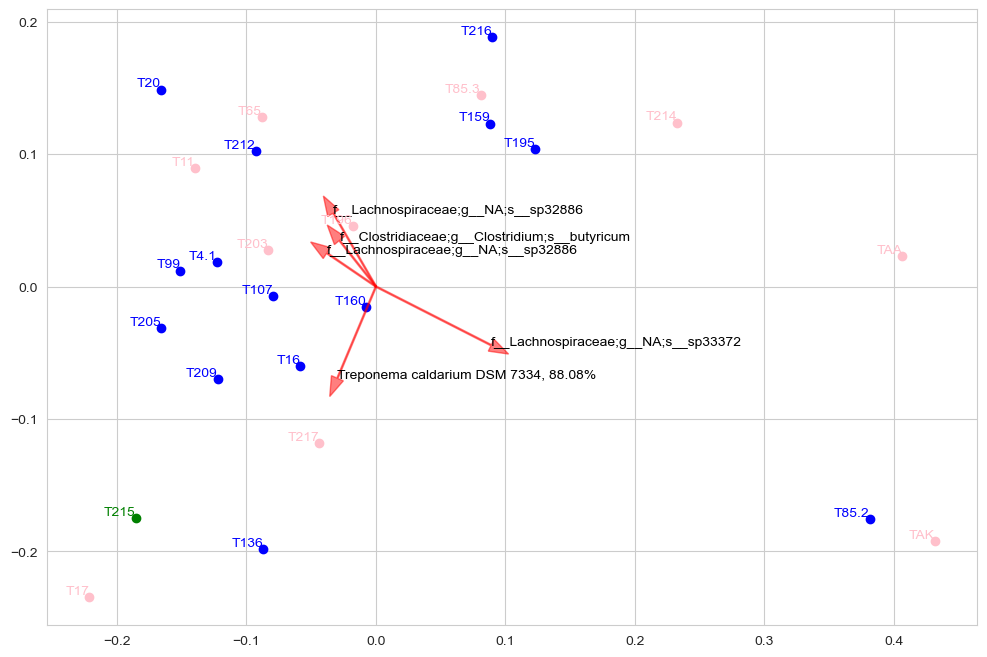

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Updated loadings with sequences 2, 3, 8, 11, and 15 as per user request
loadings = {
    'seq': ['f__Lachnospiraceae;g__NA;s__sp32886', 'f__Clostridiaceae;g__Clostridium;s__butyricum', 'Treponema caldarium DSM 7334, 88.08%', 'f__Lachnospiraceae;g__NA;s__sp33372', 'f__Lachnospiraceae;g__NA;s__sp32886'],
    'PC1': [-0.037968022, -0.028180197, -0.029762223, 0.088978431, -0.032933484],
    'PC2': [0.025320453, 0.034811183, -0.069247813, -0.044288783, 0.055472628]
}

# Provided sample data
samples = {
    'Site': ['T159', 'T136', 'T16', 'T17', 'T11', 'T205', 'T209', 'T99', 'T107', 'T203',
             'TAA', 'TAK', 'T160', 'T4.1', 'T20', 'T214', 'T215', 'T217', 'T216', 'T212', 'T65',
             'T195', 'T196', 'T85.2', 'T85.3', 'T85.1'],
    'PC1': [0.088424459, -0.087083212, -0.058345497, -0.221195732, -0.139786938, -0.166067617,
            -0.122075271, -0.15120632, -0.079338291, -0.083259956, 0.406312983, 0.431643148,
            -0.007650314, -0.123059654, -0.16628776, 0.232694381, -0.185451647, -0.043950995,
            0.089698157, -0.092910591, -0.088239354, 0.123061833, -0.017942797, 0.381130771,
            0.080886216],
    'PC2': [0.123017248, -0.198356088, -0.060009363, -0.234618556, 0.089494945, -0.031308774,
            -0.069964296, 0.011918052, -0.007022335, 0.02740614, 0.022982969, -0.192407168,
            -0.015448889, 0.018227141, 0.148751078, 0.123763591, -0.174969254, -0.118402238,
            0.188217637, 0.102259932, 0.128004995, 0.103811336, 0.045578899, -0.175433473,
            0.144506471]
}

# Manually input metadata
manual_metadata = {
    'Site': ['T159', 'T136', 'T16', 'T17', 'T11', 'T205', 'T209', 'T99', 'T107', 'T203',
             'TAA', 'TAK', 'T160', 'T4.1', 'T20', 'T214', 'T215', 'T217', 'T216', 'T212', 'T65',
             'T195', 'T196', 'T85.2', 'T85.3', 'T85.1'],
    'Sex': ['M', 'M', 'M', 'F', 'F', 'M', 'M', 'M', 'M', 'F',
            'F', 'F', 'M', 'M', 'M', 'F', 'Juv.', 'F', 'M', 'M', 'F',
            'M', 'F', 'M', 'F', 'F']
}

# Check the lengths of lists
print(f"Number of sites: {len(samples['Site'])}")
print(f"Number of sexes: {len(manual_metadata['Sex'])}")

# Ensure lengths match
assert len(samples['Site']) == len(manual_metadata['Sex']), "Mismatch in number of sites and sexes"

# Map 'Sex' to colors
color_map = {'M': 'blue', 'F': 'pink', 'Juv.': 'green'}
colors = [color_map[sex] for sex in manual_metadata['Sex']]

# Convert to numpy arrays for easier manipulation
loadings_pc1 = np.array(loadings['PC1'])
loadings_pc2 = np.array(loadings['PC2'])
samples_pc1 = np.array(samples['PC1'])
samples_pc2 = np.array(samples['PC2'])

# Given percentage variance for each PC
pc1_variance = 20.59  # PC1 variance percentage
pc2_variance = 9.163  # PC2 variance percentage

# Plotting the biplot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot samples as points
for i in range(len(samples_pc1)):
    ax.scatter(samples_pc1[i], samples_pc2[i], color=colors[i], label=f'{samples["Site"][i]} ({manual_metadata["Sex"][i]})')

# Plot loadings as vectors
for i, txt in enumerate(loadings['seq']):
    ax.arrow(0, 0, loadings_pc1[i], loadings_pc2[i], color='red', alpha=0.5, head_width=0.01)
    ax.text(loadings_pc1[i], loadings_pc2[i], txt, color='black')

# Annotate samples
for i, txt in enumerate(samples['Site']):
    ax.text(samples_pc1[i], samples_pc2[i], txt, color=colors[i], ha='right', va='bottom')

ax.set_xlabel(f'PC1 ({pc1_variance}%)')
ax.set_ylabel(f'PC2 ({pc2_variance}%)')
ax.set_title('Bray-Curtis Biplot (ASVs with Taxonomic Assignments)')
ax.grid(True)

# Create a legend for male, female, and juvenile
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Male', markersize=10, markerfacecolor='blue'),
                   Line2D([0], [0], marker='o', color='w', label='Female', markersize=10, markerfacecolor='pink'),
                   Line2D([0], [0], marker='o', color='w', label='Juvenile', markersize=10, markerfacecolor='green')]
ax.legend(handles=legend_elements, loc='upper right')

# Display the plot
plt.show()


In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Updated loadings with sequences 2, 3, 8, 11, and 15 as per user request
loadings = {
    'seq': ['f__Lachnospiraceae;g__NA;s__sp32886', 'f__Clostridiaceae;g__Clostridium;s__butyricum', 'Treponema caldarium DSM 7334, 88.08%', 'f__Lachnospiraceae;g__NA;s__sp33372', 'f__Lachnospiraceae;g__NA;s__sp32886'],
    'PC1': [-0.037968022, -0.028180197, -0.029762223, 0.088978431, -0.032933484],
    'PC2': [0.025320453, 0.034811183, -0.069247813, -0.044288783, 0.055472628]
}

# Provided sample data
samples = {
    'Site': ['T159', 'T136', 'T16', 'T17', 'T11', 'T205', 'T209', 'T99', 'T107', 'T203',
             'TAA', 'TAK', 'T160', 'T4.1', 'T20', 'T214', 'T215', 'T217', 'T216', 'T212', 'T65',
             'T195', 'T196', 'T85.2', 'T85.3', 'T85.1'],
    'PC1': [0.088424459, -0.087083212, -0.058345497, -0.221195732, -0.139786938, -0.166067617,
            -0.122075271, -0.15120632, -0.079338291, -0.083259956, 0.406312983, 0.431643148,
            -0.007650314, -0.123059654, -0.16628776, 0.232694381, -0.185451647, -0.043950995,
            0.089698157, -0.092910591, -0.088239354, 0.123061833, -0.017942797, 0.381130771,
            0.080886216],
    'PC2': [0.123017248, -0.198356088, -0.060009363, -0.234618556, 0.089494945, -0.031308774,
            -0.069964296, 0.011918052, -0.007022335, 0.02740614, 0.022982969, -0.192407168,
            -0.015448889, 0.018227141, 0.148751078, 0.123763591, -0.174969254, -0.118402238,
            0.188217637, 0.102259932, 0.128004995, 0.103811336, 0.045578899, -0.175433473,
            0.144506471]
}

# Manually input metadata
manual_metadata = {
    'Site': ['T159', 'T136', 'T16', 'T17', 'T11', 'T205', 'T209', 'T99', 'T107', 'T203',
             'TAA', 'TAK', 'T160', 'T4.1', 'T20', 'T214', 'T215', 'T217', 'T216', 'T212', 'T65',
             'T195', 'T196', 'T85.2', 'T85.3', 'T85.1'],
    'Sex': ['M', 'M', 'M', 'F', 'F', 'M', 'M', 'M', 'M', 'F',
            'F', 'F', 'M', 'M', 'M', 'F', 'Juv.', 'F', 'M', 'M', 'F',
            'M', 'F', 'M', 'F', 'F']
}

# Check the lengths of lists
print(f"Number of sites: {len(samples['Site'])}")
print(f"Number of sexes: {len(manual_metadata['Sex'])}")

# Ensure lengths match
assert len(samples['Site']) == len(manual_metadata['Sex']), "Mismatch in number of sites and sexes"

# Map 'Sex' to colors
color_map = {'M': 'blue', 'F': 'pink', 'Juv.': 'green'}
colors = [color_map[sex] for sex in manual_metadata['Sex']]

# Convert to numpy arrays for easier manipulation
loadings_pc1 = np.array(loadings['PC1'])
loadings_pc2 = np.array(loadings['PC2'])
samples_pc1 = np.array(samples['PC1'])
samples_pc2 = np.array(samples['PC2'])

# Check the lengths of the PC arrays
print(f"Length of samples_pc1: {len(samples_pc1)}")
print(f"Length of samples_pc2: {len(samples_pc2)}")

# Ensure lengths of PC arrays match the number of sites
assert len(samples_pc1) == len(samples['Site']), "Mismatch in length of samples_pc1 and number of sites"
assert len(samples_pc2) == len(samples['Site']), "Mismatch in length of samples_pc2 and number of sites"

# Given percentage variance for each PC
pc1_variance = 20.59  # PC1 variance percentage
pc2_variance = 9.163  # PC2 variance percentage

# Plotting the biplot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot samples as points
for i in range(len(samples_pc1)):
    ax.scatter(samples_pc1[i], samples_pc2[i], color=colors[i], label=f'{samples["Site"][i]} ({manual_metadata["Sex"][i]})')

# Plot loadings as vectors
for i, txt in enumerate(loadings['seq']):
    ax.arrow(0, 0, loadings_pc1[i], loadings_pc2[i], color='red', alpha=0.5, head_width=0.01)
    ax.text(loadings_pc1[i], loadings_pc2[i], txt, color='black')

# Annotate samples
for i, txt in enumerate(samples['Site']):
    ax.text(samples_pc1[i], samples_pc2[i], txt, color=colors[i], ha='right', va='bottom')

ax.set_xlabel(f'PC1 ({pc1_variance}%)')
ax.set_ylabel(f'PC2 ({pc2_variance}%)')
ax.set_title('Bray-Curtis Biplot (ASVs with Taxonomic Assignments)')
ax.grid(True)

# Create a legend for male, female, and juvenile
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Male', markersize=10, markerfacecolor='blue'),
                   Line2D([0], [0], marker='o', color='w', label='Female', markersize=10, markerfacecolor='pink'),
                   Line2D([0], [0], marker='o', color='w', label='Juvenile', markersize=10, markerfacecolor='green')]
ax.legend(handles=legend_elements, loc='upper right')

# Display the plot
plt.show()


Number of sites: 26
Number of sexes: 26
Length of samples_pc1: 25
Length of samples_pc2: 25


AssertionError: Mismatch in length of samples_pc1 and number of sites

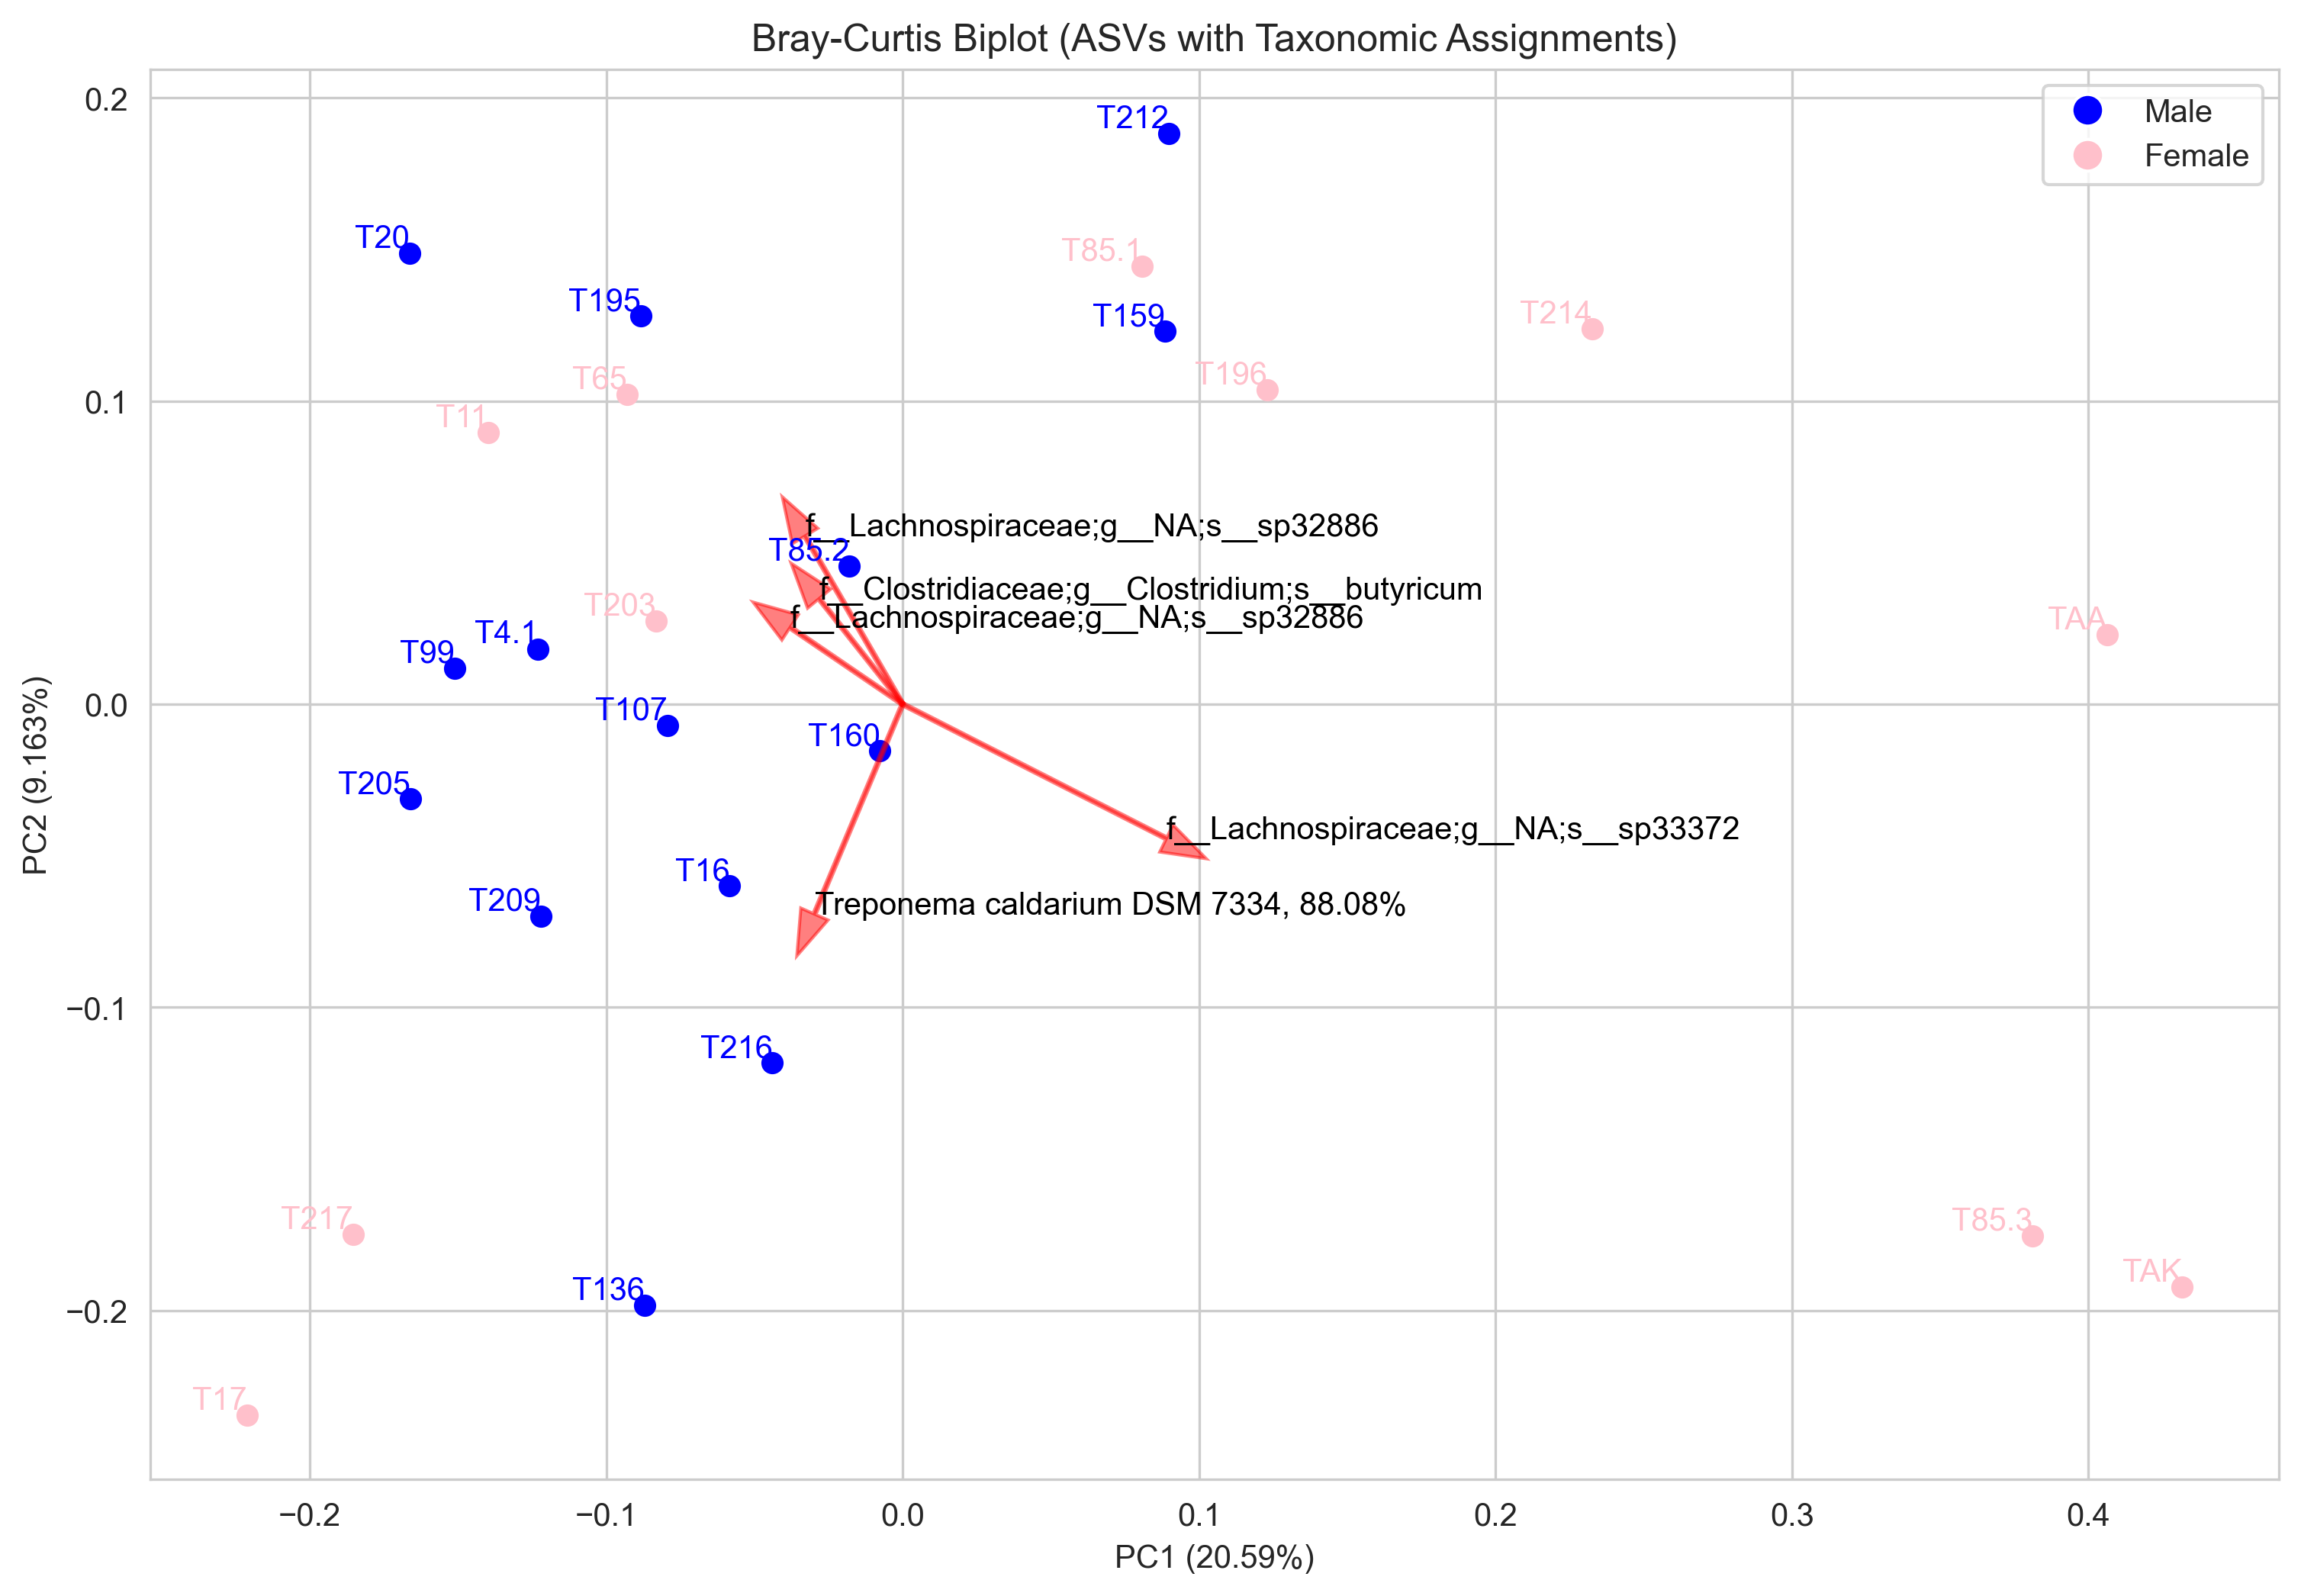

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Updated loadings with sequences 2, 3, 4, 8, and 13 as per user request
loadings = {
    'seq': ['f__Lachnospiraceae;g__NA;s__sp32886', 'f__Clostridiaceae;g__Clostridium;s__butyricum', 'Treponema caldarium DSM 7334, 88.08%', 'f__Lachnospiraceae;g__NA;s__sp33372', 'f__Lachnospiraceae;g__NA;s__sp32886'],
    'PC1': [-0.037968022, -0.028180197, -0.029762223, 0.088978431, -0.032933484],
    'PC2': [0.025320453, 0.034811183, -0.069247813, -0.044288783, 0.055472628]
}

# Provided sample data
samples = {
    'Site': ['T159', 'T136', 'T16', 'T17', 'T11', 'T205', 'T209', 'T99', 'T107', 'T203',
             'TAA', 'TAK', 'T160', 'T4.1', 'T20', 'T214', 'T217', 'T216', 'T212', 'T65',
             'T195', 'T196', 'T85.2', 'T85.3', 'T85.1'],
    'PC1': [0.088424459, -0.087083212, -0.058345497, -0.221195732, -0.139786938, -0.166067617,
            -0.122075271, -0.15120632, -0.079338291, -0.083259956, 0.406312983, 0.431643148,
            -0.007650314, -0.123059654, -0.16628776, 0.232694381, -0.185451647, -0.043950995,
            0.089698157, -0.092910591, -0.088239354, 0.123061833, -0.017942797, 0.381130771,
            0.080886216],
    'PC2': [0.123017248, -0.198356088, -0.060009363, -0.234618556, 0.089494945, -0.031308774,
            -0.069964296, 0.011918052, -0.007022335, 0.02740614, 0.022982969, -0.192407168,
            -0.015448889, 0.018227141, 0.148751078, 0.123763591, -0.174969254, -0.118402238,
            0.188217637, 0.102259932, 0.128004995, 0.103811336, 0.045578899, -0.175433473,
            0.144506471]
}

# Manually input metadata
manual_metadata = {
    'Site': ['T159', 'T136', 'T16', 'T17', 'T11', 'T205', 'T209', 'T99', 'T107', 'T203',
             'TAA', 'TAK', 'T160', 'T4.1', 'T20', 'T214', 'T217', 'T216', 'T212', 'T65',
             'T195', 'T196', 'T85.2', 'T85.3', 'T85.1'],
    'Sex': ['M', 'M', 'M', 'F', 'F', 'M', 'M', 'M', 'M', 'F',
            'F', 'F', 'M', 'M', 'M', 'F', 'F', 'M', 'M', 'F',
            'M', 'F', 'M', 'F', 'F']
}

# Map 'Sex' to colors
color_map = {'M': 'blue', 'F': 'pink'}
colors = [color_map[sex] for sex in manual_metadata['Sex']]

# Convert to numpy arrays for easier manipulation
loadings_pc1 = np.array(loadings['PC1'])
loadings_pc2 = np.array(loadings['PC2'])
samples_pc1 = np.array(samples['PC1'])
samples_pc2 = np.array(samples['PC2'])

# Given percentage variance for each PC
pc1_variance = 20.59  # PC1 variance percentage
pc2_variance = 9.163  # PC2 variance percentage

# Plotting the biplot with increased DPI
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)

# Plot samples as points
for i in range(len(samples_pc1)):
    ax.scatter(samples_pc1[i], samples_pc2[i], color=colors[i], label=f'{samples["Site"][i]} ({manual_metadata["Sex"][i]})')

# Plot loadings as vectors
for i, txt in enumerate(loadings['seq']):
    ax.arrow(0, 0, loadings_pc1[i], loadings_pc2[i], color='red', alpha=0.5, head_width=0.01)
    ax.text(loadings_pc1[i], loadings_pc2[i], txt, color='black')

# Annotate samples
for i, txt in enumerate(samples['Site']):
    ax.text(samples_pc1[i], samples_pc2[i], txt, color=colors[i], ha='right', va='bottom')

ax.set_xlabel(f'PC1 ({pc1_variance}%)')
ax.set_ylabel(f'PC2 ({pc2_variance}%)')
ax.set_title('Bray-Curtis Biplot (ASVs with Taxonomic Assignments)')
ax.grid(True)

# Create a legend for male and female
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Male', markersize=10, markerfacecolor='blue'),
                   Line2D([0], [0], marker='o', color='w', label='Female', markersize=10, markerfacecolor='pink')]
ax.legend(handles=legend_elements, loc='upper right')

# Display the plot
plt.show()

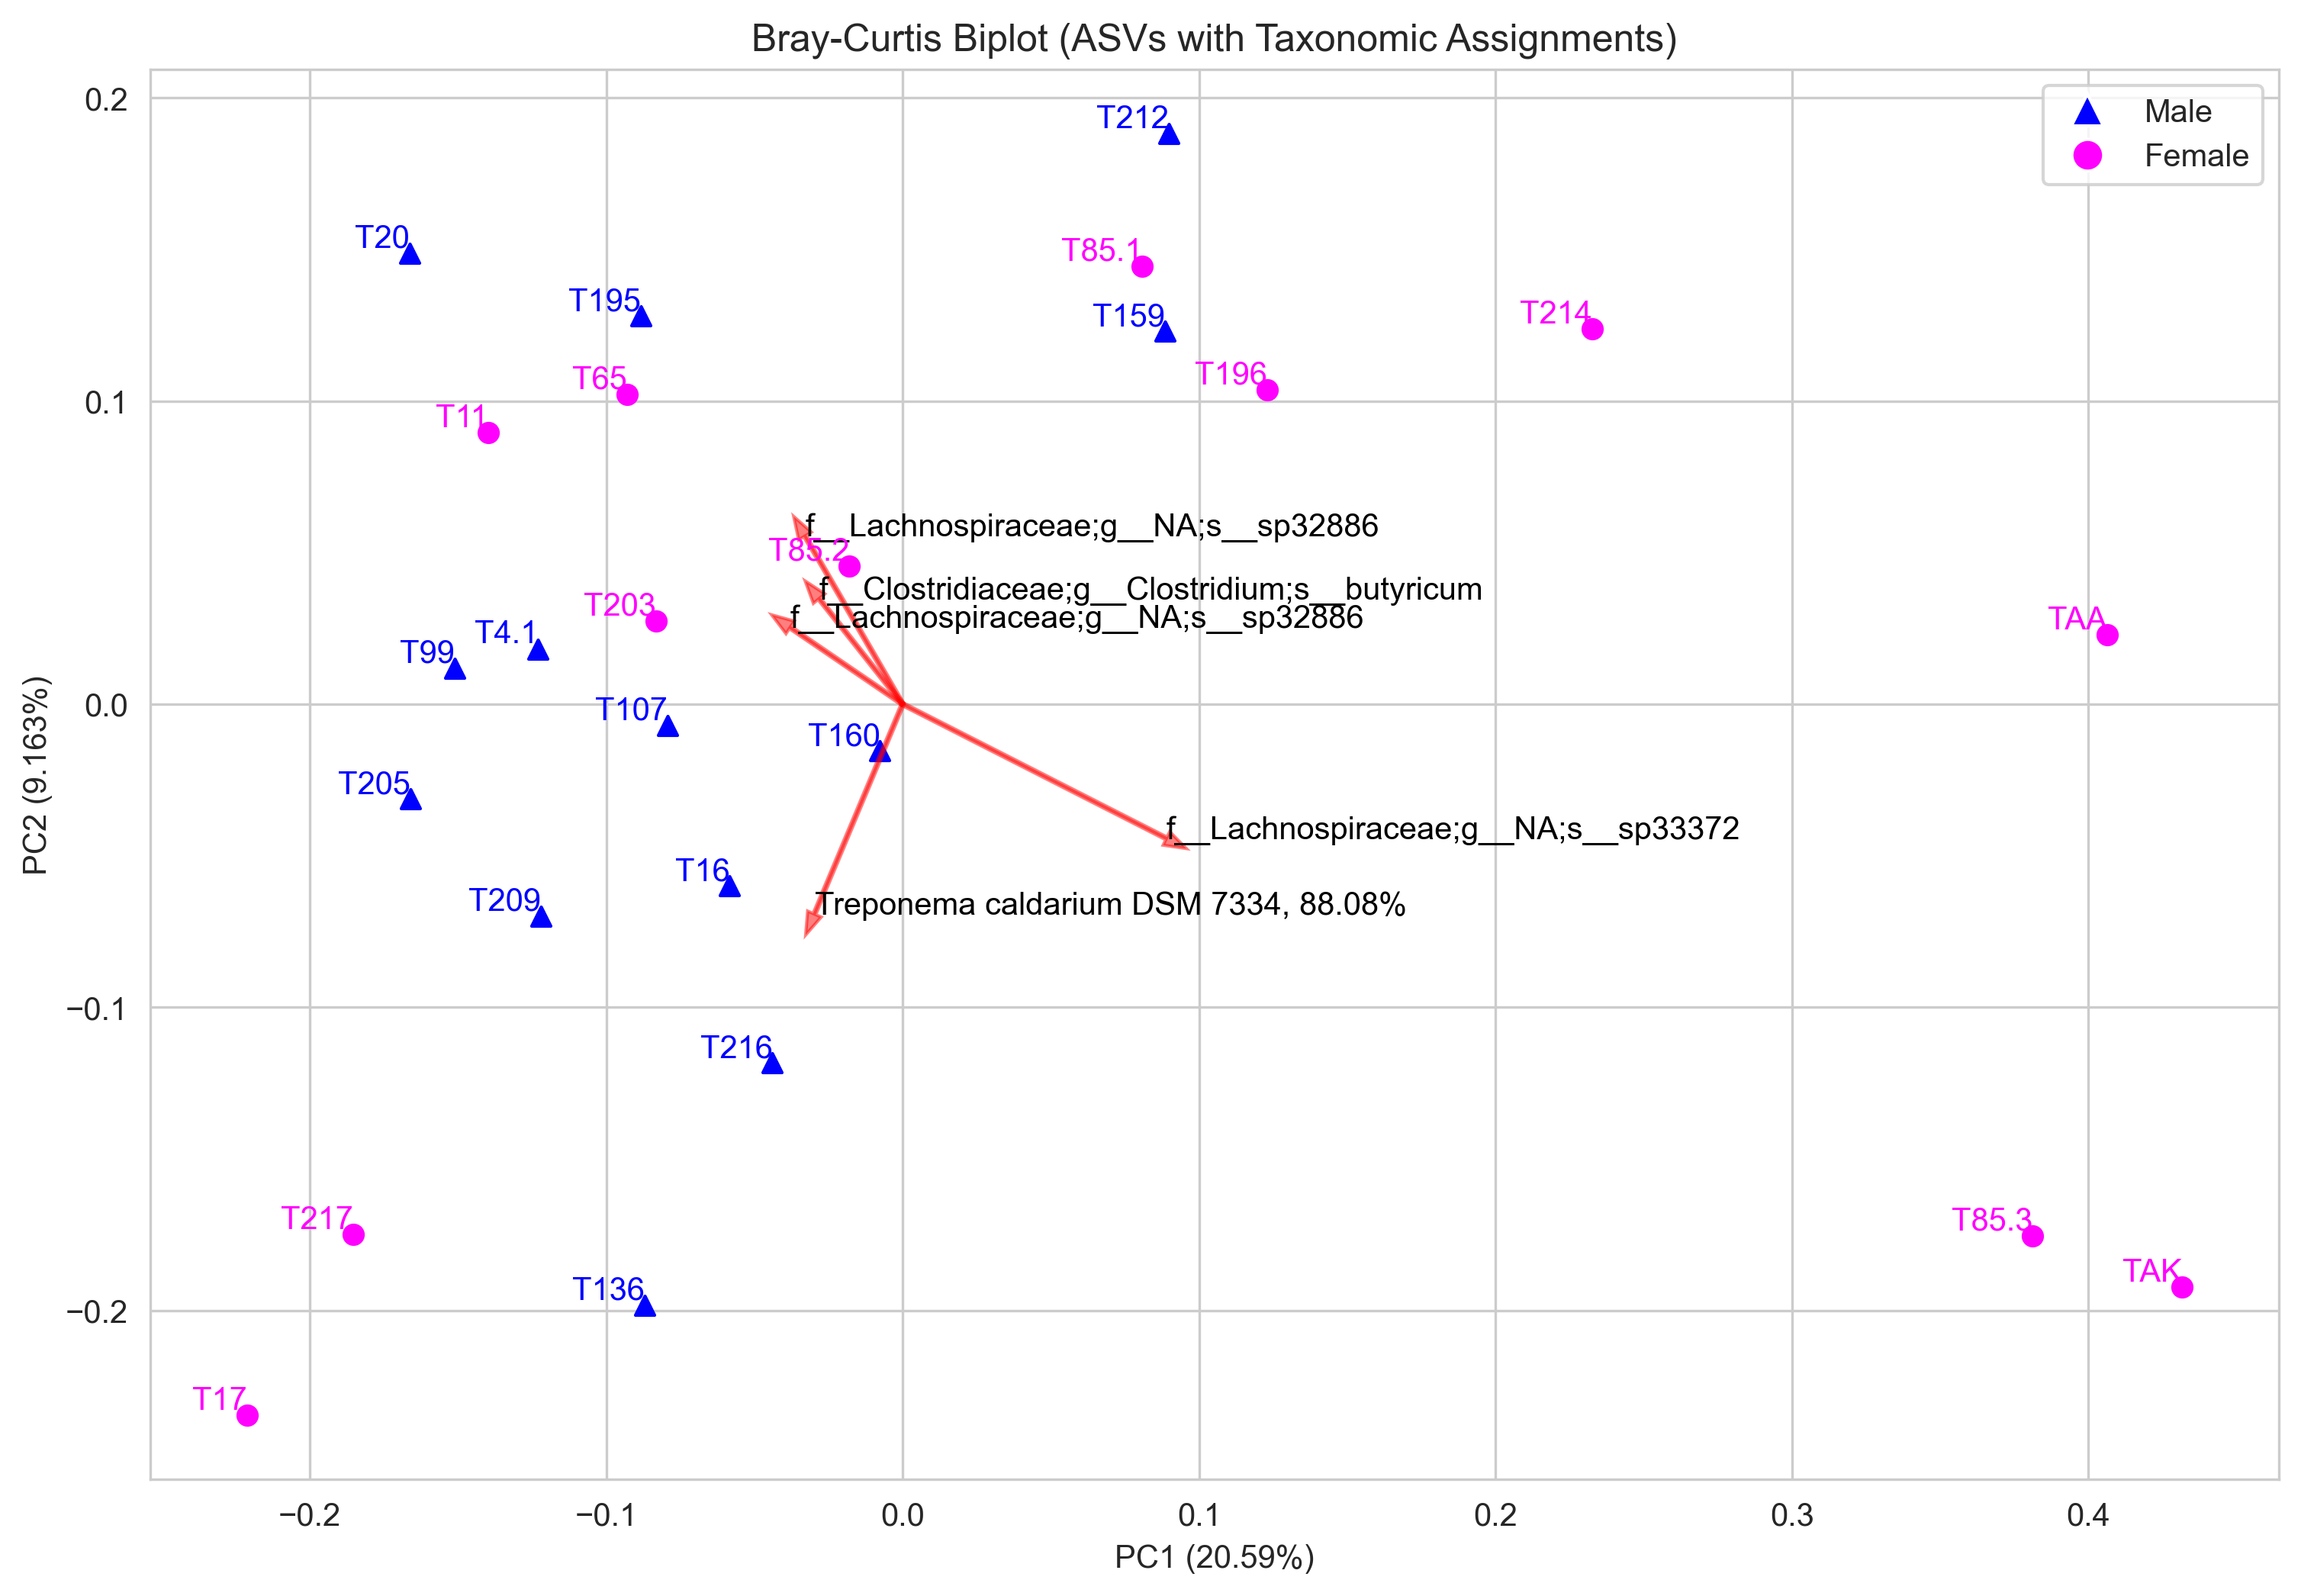

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Updated loadings with sequences 2, 3, 4, 8, and 13 as per user request
loadings = {
    'seq': ['f__Lachnospiraceae;g__NA;s__sp32886', 'f__Clostridiaceae;g__Clostridium;s__butyricum', 'Treponema caldarium DSM 7334, 88.08%', 'f__Lachnospiraceae;g__NA;s__sp33372', 'f__Lachnospiraceae;g__NA;s__sp32886'],
    'PC1': [-0.037968022, -0.028180197, -0.029762223, 0.088978431, -0.032933484],
    'PC2': [0.025320453, 0.034811183, -0.069247813, -0.044288783, 0.055472628]
}

# Provided sample data
samples = {
    'Site': ['T159', 'T136', 'T16', 'T17', 'T11', 'T205', 'T209', 'T99', 'T107', 'T203',
             'TAA', 'TAK', 'T160', 'T4.1', 'T20', 'T214', 'T217', 'T216', 'T212', 'T65',
             'T195', 'T196', 'T85.2', 'T85.3', 'T85.1'],
    'PC1': [0.088424459, -0.087083212, -0.058345497, -0.221195732, -0.139786938, -0.166067617,
            -0.122075271, -0.15120632, -0.079338291, -0.083259956, 0.406312983, 0.431643148,
            -0.007650314, -0.123059654, -0.16628776, 0.232694381, -0.185451647, -0.043950995,
            0.089698157, -0.092910591, -0.088239354, 0.123061833, -0.017942797, 0.381130771,
            0.080886216],
    'PC2': [0.123017248, -0.198356088, -0.060009363, -0.234618556, 0.089494945, -0.031308774,
            -0.069964296, 0.011918052, -0.007022335, 0.02740614, 0.022982969, -0.192407168,
            -0.015448889, 0.018227141, 0.148751078, 0.123763591, -0.174969254, -0.118402238,
            0.188217637, 0.102259932, 0.128004995, 0.103811336, 0.045578899, -0.175433473,
            0.144506471]
}

# Manually input metadata
manual_metadata = {
    'Site': ['T159', 'T136', 'T16', 'T17', 'T11', 'T205', 'T209', 'T99', 'T107', 'T203',
             'TAA', 'TAK', 'T160', 'T4.1', 'T20', 'T214', 'T217', 'T216', 'T212', 'T65',
             'T195', 'T196', 'T85.2', 'T85.3', 'T85.1'],
    'Sex': ['M', 'M', 'M', 'F', 'F', 'M', 'M', 'M', 'M', 'F',
            'F', 'F', 'M', 'M', 'M', 'F', 'F', 'M', 'M', 'F',
            'M', 'F', 'F', 'F', 'F']
}

# Map 'Sex' to colors and markers
color_map = {'M': 'blue', 'F': 'magenta'}
marker_map = {'M': '^', 'F': 'o'}
colors = [color_map[sex] for sex in manual_metadata['Sex']]
markers = [marker_map[sex] for sex in manual_metadata['Sex']]

# Convert to numpy arrays for easier manipulation
loadings_pc1 = np.array(loadings['PC1'])
loadings_pc2 = np.array(loadings['PC2'])
samples_pc1 = np.array(samples['PC1'])
samples_pc2 = np.array(samples['PC2'])

# Given percentage variance for each PC
pc1_variance = 20.59  # PC1 variance percentage
pc2_variance = 9.163  # PC2 variance percentage

# Plotting the biplot with increased DPI
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)

# Plot samples as points with different markers for males and females
for i in range(len(samples_pc1)):
    ax.scatter(samples_pc1[i], samples_pc2[i], color=colors[i], marker=markers[i], label=f'{samples["Site"][i]} ({manual_metadata["Sex"][i]})')

# Plot loadings as vectors
for i, txt in enumerate(loadings['seq']):
    ax.arrow(0, 0, loadings_pc1[i], loadings_pc2[i], color='red', alpha=0.5, head_width=0.005)
    ax.text(loadings_pc1[i], loadings_pc2[i], txt, color='black')

# Annotate samples
for i, txt in enumerate(samples['Site']):
    ax.text(samples_pc1[i], samples_pc2[i], txt, color=colors[i], ha='right', va='bottom')

ax.set_xlabel(f'PC1 ({pc1_variance}%)')
ax.set_ylabel(f'PC2 ({pc2_variance}%)')
ax.set_title('Bray-Curtis Biplot (ASVs with Taxonomic Assignments)')
ax.grid(True)

# Create a legend for male and female
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='^', color='w', label='Male', markersize=10, markerfacecolor='blue'),
                   Line2D([0], [0], marker='o', color='w', label='Female', markersize=10, markerfacecolor='magenta')]
ax.legend(handles=legend_elements, loc='upper right')

# Display the plot
plt.show()


In [1]:
Sample Colors:
Red: red or #FF0000
Green: green or #00FF00
Blue: blue or #0000FF
Yellow: yellow or #FFFF00
Cyan: cyan or #00FFFF
Magenta: magenta or #FF00FF
Orange: orange or #FFA500
Purple: purple or #800080
Arrow Colors:
Black: black or #000000
Dark Red: darkred or #8B0000
Dark Green: darkgreen or #006400
Dark Blue: darkblue or #00008B
Gray: gray or #808080
Navy: navy or #000080
Maroon: maroon or #800000
Olive: olive or #808000


4

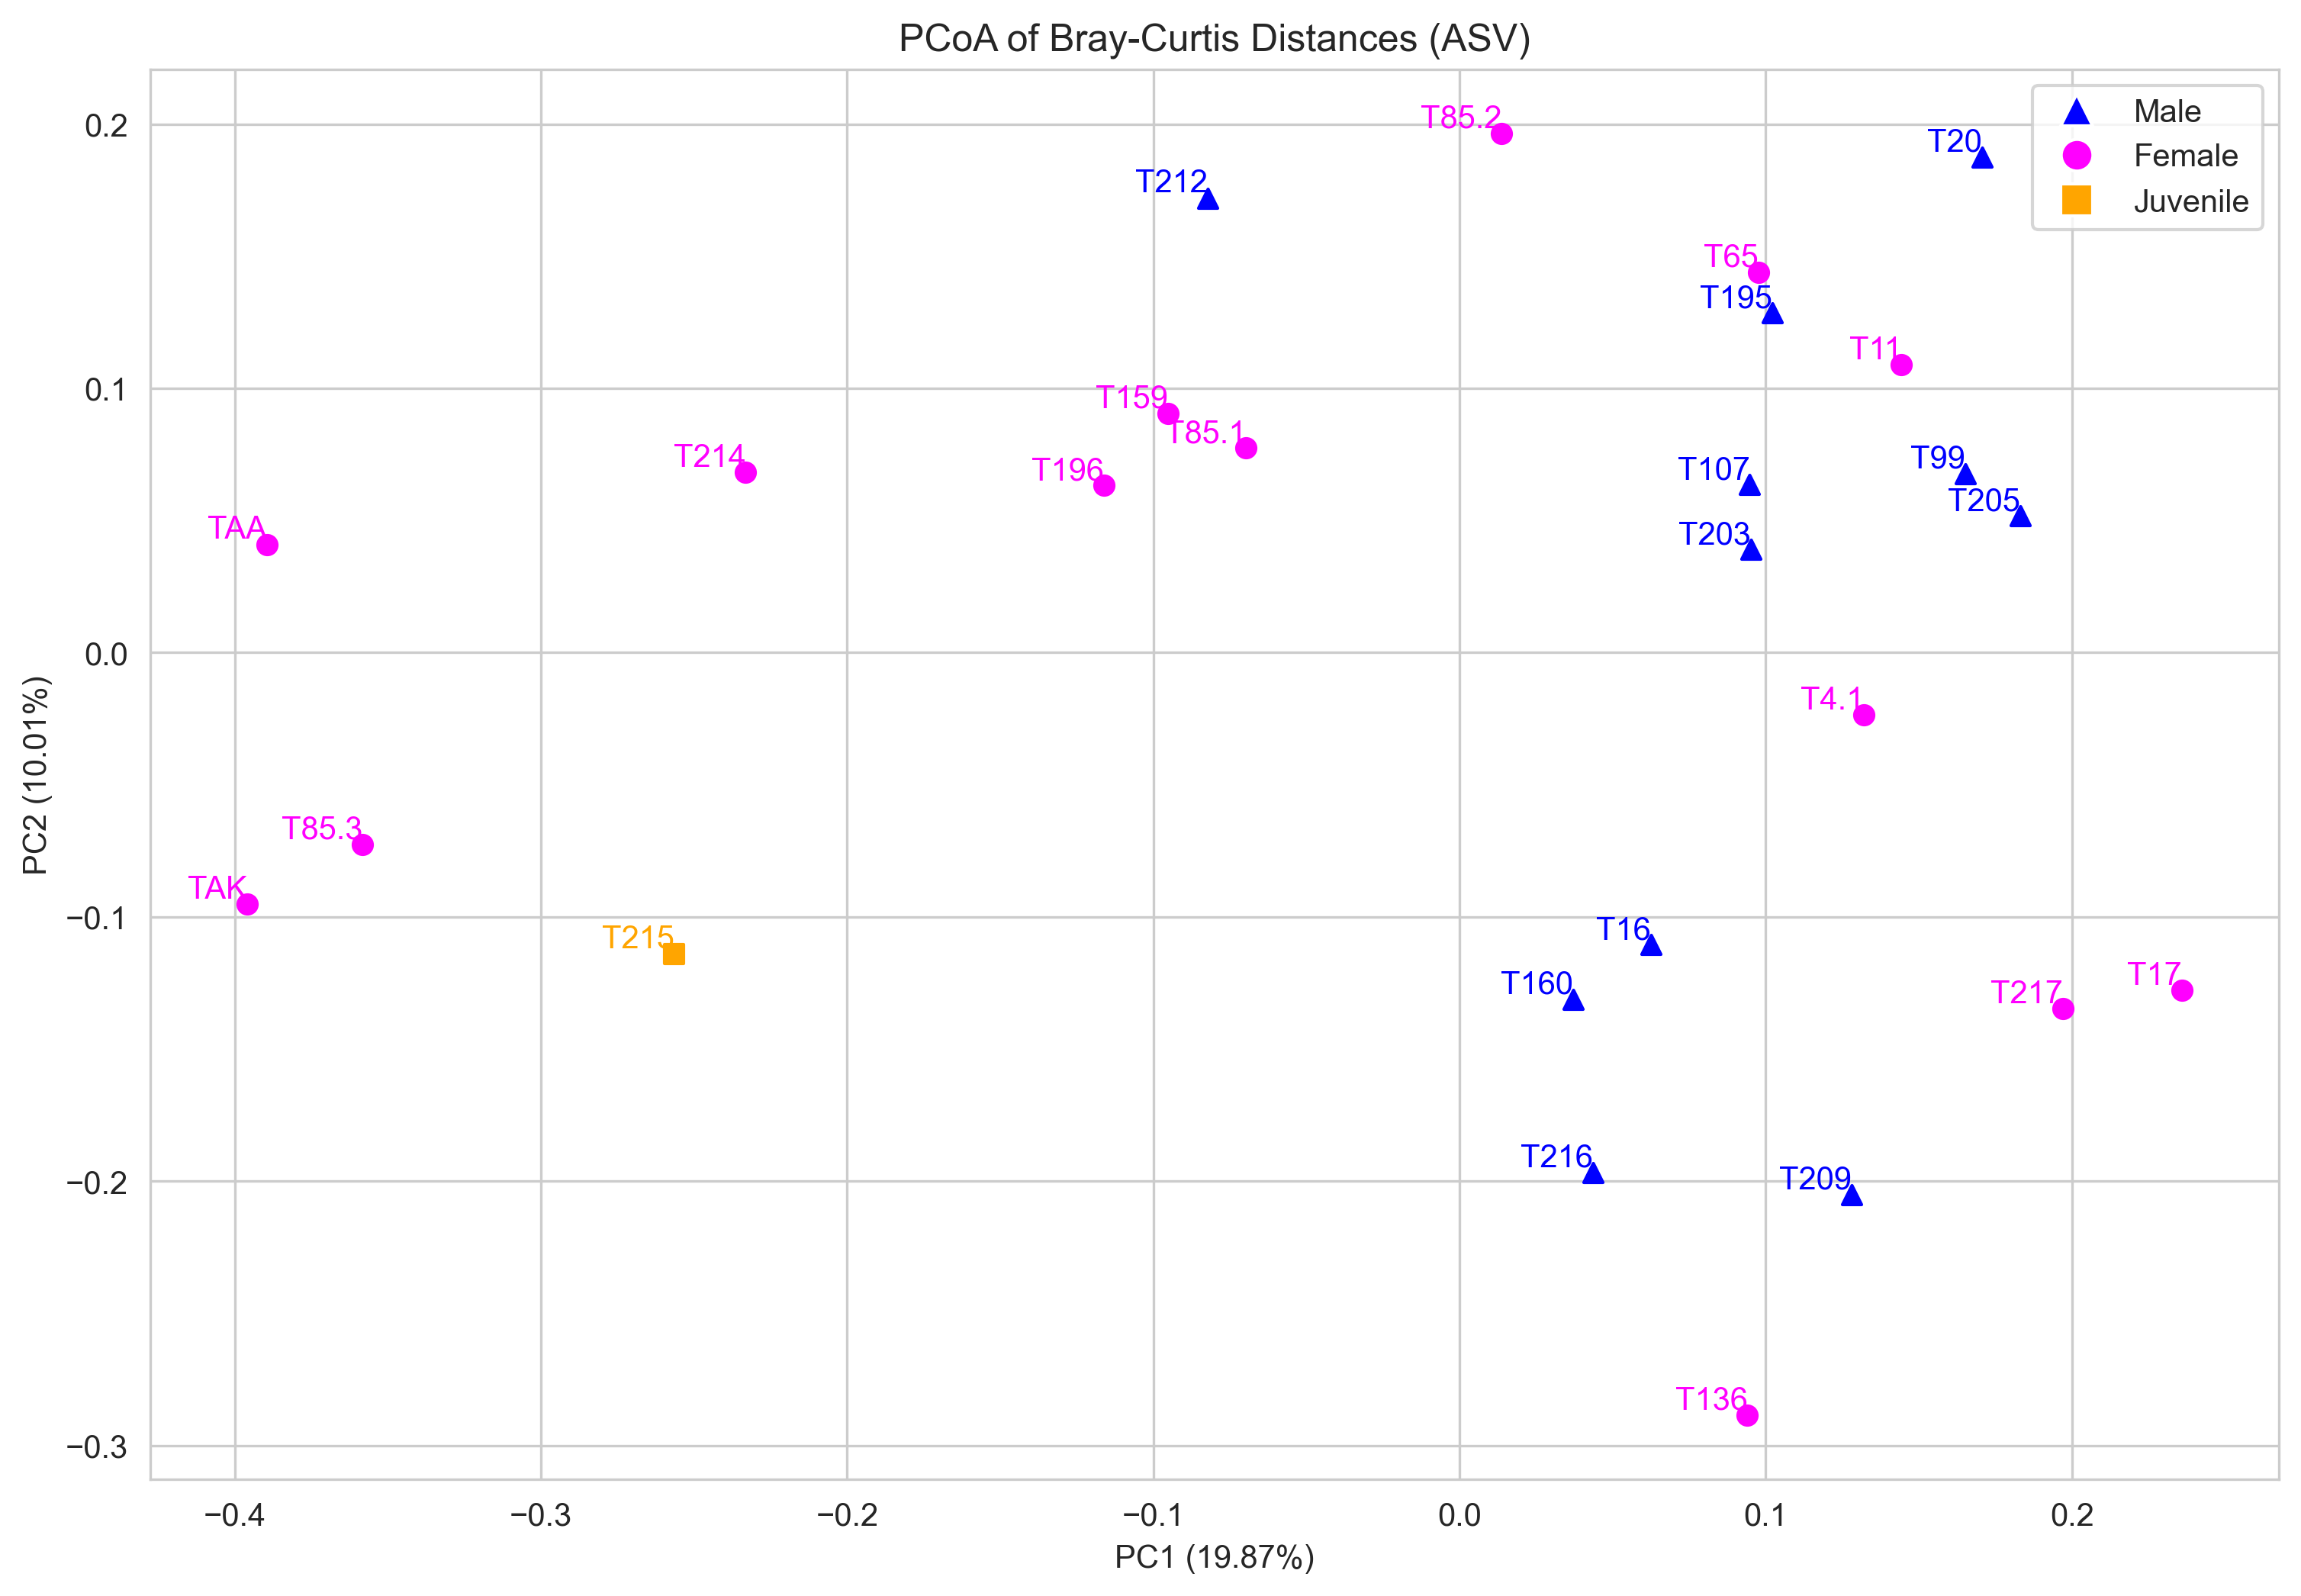

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Provided sample data with PC1 and PC2 coordinates
samples = {
    'Site': ['T4.1', 'T136', 'TAA', 'T215', 'T212', 'T65', 'T195', 'T16', 'T85.2', 'T209',
             'T20', 'T85.1', 'T216', 'T17', 'T107', 'T11', 'T214', 'T203', 'T205', 'T85.3',
             'T196', 'T217', 'T160', 'T99', 'TAK', 'T159'],
    'PC1': [0.132106749, 0.09404186, -0.389497192, -0.256575123, -0.082341681, 0.097590776,
            0.102169137, 0.062445352, 0.01378371, 0.12794519, 0.170559476, -0.069767919,
            0.043556109, 0.236005444, 0.094771858, 0.144339019, -0.233144172, 0.095194372,
            0.183110815, -0.358289828, -0.116054987, 0.196996673, 0.036989475, 0.165249179,
            -0.396046009, -0.095138285],
    'PC2': [-0.023656197, -0.288623279, 0.040953498, -0.113811878, 0.172045703, 0.143986013,
            0.128535497, -0.11048377, 0.196425248, -0.205157323, 0.18755697, 0.077453388,
            -0.196798057, -0.127880975, 0.063551467, 0.108902169, 0.068326168, 0.039048842,
            0.051683046, -0.072648901, 0.063318336, -0.134669679, -0.13113694, 0.067803811,
            -0.095244776, 0.09052162]
}

# Manually input metadata with corrected assignments
manual_metadata = {
    'Site': ['T4.1', 'T136', 'TAA', 'T215', 'T212', 'T65', 'T195', 'T16', 'T85.2', 'T209',
             'T20', 'T85.1', 'T216', 'T17', 'T107', 'T11', 'T214', 'T203', 'T205', 'T85.3',
             'T196', 'T217', 'T160', 'T99', 'TAK', 'T159'],
    'Sex': ['F', 'F', 'F', 'Juv.', 'M', 'F', 'M', 'M', 'F', 'M',
            'M', 'F', 'M', 'F', 'M', 'F', 'F', 'M', 'M', 'F',
            'F', 'F', 'M', 'M', 'F', 'F']
}

# Map 'Sex' to colors and markers
color_map = {'M': 'blue', 'F': 'magenta', 'Juv.': 'orange'}
marker_map = {'M': '^', 'F': 'o', 'Juv.': 's'}
colors = [color_map[sex] for sex in manual_metadata['Sex']]
markers = [marker_map[sex] for sex in manual_metadata['Sex']]

# Convert to numpy arrays for easier manipulation
samples_pc1 = np.array(samples['PC1'])
samples_pc2 = np.array(samples['PC2'])

# Proportion of variance explained by PC1 and PC2
pc1_variance = 19.87  # Replace with actual variance percentage for PC1
pc2_variance = 10.01  # Replace with actual variance percentage for PC2

# Plotting the PCoA with increased DPI
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)

# Plot samples as points with different markers for males, females, and juveniles
for i in range(len(samples_pc1)):
    ax.scatter(samples_pc1[i], samples_pc2[i], color=colors[i], marker=markers[i], label=f'{samples["Site"][i]} ({manual_metadata["Sex"][i]})')

# Annotate samples
for i, txt in enumerate(samples['Site']):
    ax.text(samples_pc1[i], samples_pc2[i], txt, color=colors[i], ha='right', va='bottom')

ax.set_xlabel(f'PC1 ({pc1_variance}%)')
ax.set_ylabel(f'PC2 ({pc2_variance}%)')
ax.set_title('PCoA of Bray-Curtis Distances (ASV)')
ax.grid(True)

# Create a legend for male, female, and juvenile
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='^', color='w', label='Male', markersize=10, markerfacecolor='blue'),
                   Line2D([0], [0], marker='o', color='w', label='Female', markersize=10, markerfacecolor='magenta'),
                   Line2D([0], [0], marker='s', color='w', label='Juvenile', markersize=10, markerfacecolor='orange')]
ax.legend(handles=legend_elements, loc='upper right')

# Display the plot
plt.show()


In [ ]:
biom convert -i /Users/dimitriosgiakoumas/Downloads/PERM/ASV_Table.tsv -o /Users/dimitriosgiakoumas/Downloads/PERM/ASV_Table.biom --to-hdf5 --table-type="OTU table"

qiime tools import \
    --type 'FeatureTable[Frequency]' \
           --input-path /Users/dimitriosgiakoumas/Downloads/PERM/ASV_Table.biom \
           --output-path /Users/dimitriosgiakoumas/Downloads/PERM/feature-table.qza

qiime diversity beta \
                --i-table /Users/dimitriosgiakoumas/Downloads/PERM/feature-table.qza \
                --p-metric braycurtis \
                           --o-distance-matrix /Users/dimitriosgiakoumas/Downloads/PERM/bray-curtis-matrix.qza

qiime feature-table relative-frequency \
                    --i-table /Users/dimitriosgiakoumas/Downloads/PERM/feature-table.qza \
                    --o-relative-frequency-table /Users/dimitriosgiakoumas/Downloads/PERM/feature-table-relative.qza

qiime diversity pcoa-biplot \
                --i-pcoa /Users/dimitriosgiakoumas/Downloads/PERM/bray-curtis-pcoa.qza \
                --i-features /Users/dimitriosgiakoumas/Downloads/PERM/feature-table-relative.qza \
                --o-biplot /Users/dimitriosgiakoumas/Downloads/PERM/bray-curtis-biplot.qza

qiime diversity biplot \
                --i-pcoa /Users/dimitriosgiakoumas/Downloads/PERM/bray-curtis-pcoa.qza \
                --i-table /Users/dimitriosgiakoumas/Downloads/PERM/feature-table.qza \
                --m-sample-metadata-file /Users/dimitriosgiakoumas/Downloads/PERM/Metadata.tsv \
                --o-biplot /Users/dimitriosgiakoumas/Downloads/PERM/bray-curtis-biplot.qza

qiime emperor plot \
              --i-pcoa /Users/dimitriosgiakoumas/Downloads/PERM/bray-curtis-pcoa.qza \
              --m-metadata-file /Users/dimitriosgiakoumas/Downloads/PERM/Metadata.tsv \
              --o-visualization /Users/dimitriosgiakoumas/Downloads/PERM/bray-curtis-pcoa-emperor.qzv

qiime tools export \
            --input-path /Users/dimitriosgiakoumas/Downloads/PERM/bray-curtis-biplot.qza \
            --output-path /Users/dimitriosgiakoumas/Downloads/PERM/exported-bray-curtis-biplot



In [ ]:
biom convert -i /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/ASV_Table.tsv -o /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/ASV_Table.biom --to-hdf5 --table-type="OTU table"

qiime tools import \
    --type 'FeatureTable[Frequency]' \
           --input-path /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/ASV_Table.biom \
           --output-path /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/feature-table.qza

qiime diversity beta \
                --i-table /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/feature-table.qza \
                --p-metric braycurtis \
                           --o-distance-matrix /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-matrix.qza

# Convert distance matrix to PCoA
qiime diversity pcoa \
                --i-distance-matrix /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-matrix.qza \
                --o-pcoa /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-pcoa.qza

qiime feature-table relative-frequency \
                    --i-table /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/feature-table.qza \
                    --o-relative-frequency-table /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/feature-table-relative.qza

qiime diversity pcoa-biplot \
                --i-pcoa /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-pcoa.qza \
                --i-features /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/feature-table-relative.qza \
                --o-biplot /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-biplot.qza

qiime diversity biplot \
                --i-pcoa /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-pcoa.qza \
                --i-table /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/feature-table.qza \
                --m-sample-metadata-file /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/Metadata.tsv \
                --o-biplot /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-biplot.qza

qiime emperor plot \
              --i-pcoa /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-pcoa.qza \
              --m-metadata-file /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/Metadata.tsv \
              --o-visualization /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-pcoa-emperor.qzvZ

qiime tools export \
            --input-path /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-biplot.qza \
            --output-path /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/exported-bray-curtis-biplot


In [ ]:
# Convert TSV to BIOM format
biom convert -i /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/ASV_Table.tsv -o /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/ASV_Table.biom --to-hdf5 --table-type="OTU table"

# Import BIOM to QIIME2
qiime tools import \
    --type 'FeatureTable[Frequency]' \
           --input-path /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/ASV_Table.biom \
           --output-path /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/feature-table.qza

# Calculate beta diversity using Bray-Curtis
qiime diversity beta \
                --i-table /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/feature-table.qza \
                --p-metric braycurtis \
                           --o-distance-matrix /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-matrix.qza

# Convert distance matrix to PCoA
qiime diversity pcoa \
                --i-distance-matrix /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-matrix.qza \
                --o-pcoa /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-pcoa.qza

# Calculate relative frequencies
qiime feature-table relative-frequency \
                    --i-table /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/feature-table.qza \
                    --o-relative-frequency-table /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/feature-table-relative.qza

# Create a biplot
qiime diversity pcoa-biplot \
                --i-pcoa /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-pcoa.qza \
                --i-features /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/feature-table-relative.qza \
                --o-biplot /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-biplot.qza

# Additional diversity biplot command (duplicate, should be unnecessary)
# qiime diversity biplot \
#     --i-pcoa /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-pcoa.qza \
#     --i-table /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/feature-table.qza \
#     --m-sample-metadata-file /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/Metadata.tsv \
#     --o-biplot /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-biplot.qza

# Create an Emperor plot
qiime emperor plot \
              --i-pcoa /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-pcoa.qza \
              --m-metadata-file /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/Metadata.tsv \
              --o-visualization /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-pcoa-emperor.qzv

# Export the biplot for further analysis
qiime tools export \
            --input-path /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-biplot.qza \
            --output-path /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/exported-bray-curtis-biplot


In [ ]:
#PCoA<---------------------------------------
# Convert TSV to BIOM format
biom convert -i /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/ASV_Table.tsv -o /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/ASV_Table.biom --to-hdf5 --table-type="OTU table"

# Import BIOM to QIIME2
qiime tools import \
    --type 'FeatureTable[Frequency]' \
           --input-path /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/ASV_Table.biom \
           --output-path /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/feature-table.qza

# Calculate beta diversity using Bray-Curtis
qiime diversity beta \
                --i-table /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/feature-table.qza \
                --p-metric braycurtis \
                           --o-distance-matrix /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-matrix.qza

# Convert distance matrix to PCoA
qiime diversity pcoa \
                --i-distance-matrix /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-matrix.qza \
                --o-pcoa /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-pcoa.qza

# Calculate relative frequencies
qiime feature-table relative-frequency \
                    --i-table /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/feature-table.qza \
                    --o-relative-frequency-table /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/feature-table-relative.qza

# Create a biplot
qiime diversity pcoa-biplot \
                --i-pcoa /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-pcoa.qza \
                --i-features /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/feature-table-relative.qza \
                --o-biplot /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-biplot.qza

qiime emperor biplot \
              --i-biplot /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-biplot.qza \
              --m-sample-metadata-file /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/Metadata.tsv \
              --o-visualization /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-pcoa-emperor.qzv


# Create an Emperor plot
qiime emperor plot \
              --i-pcoa /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-biplot.qza \
              --m-metadata-file /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/Metadata.tsv \
              --o-visualization /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-pcoa-emperor.qzv

# Export the biplot for further analysis (optional)
qiime tools export \
            --input-path /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-biplot.qza \
            --output-path /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/exported-bray-curtis-biplot


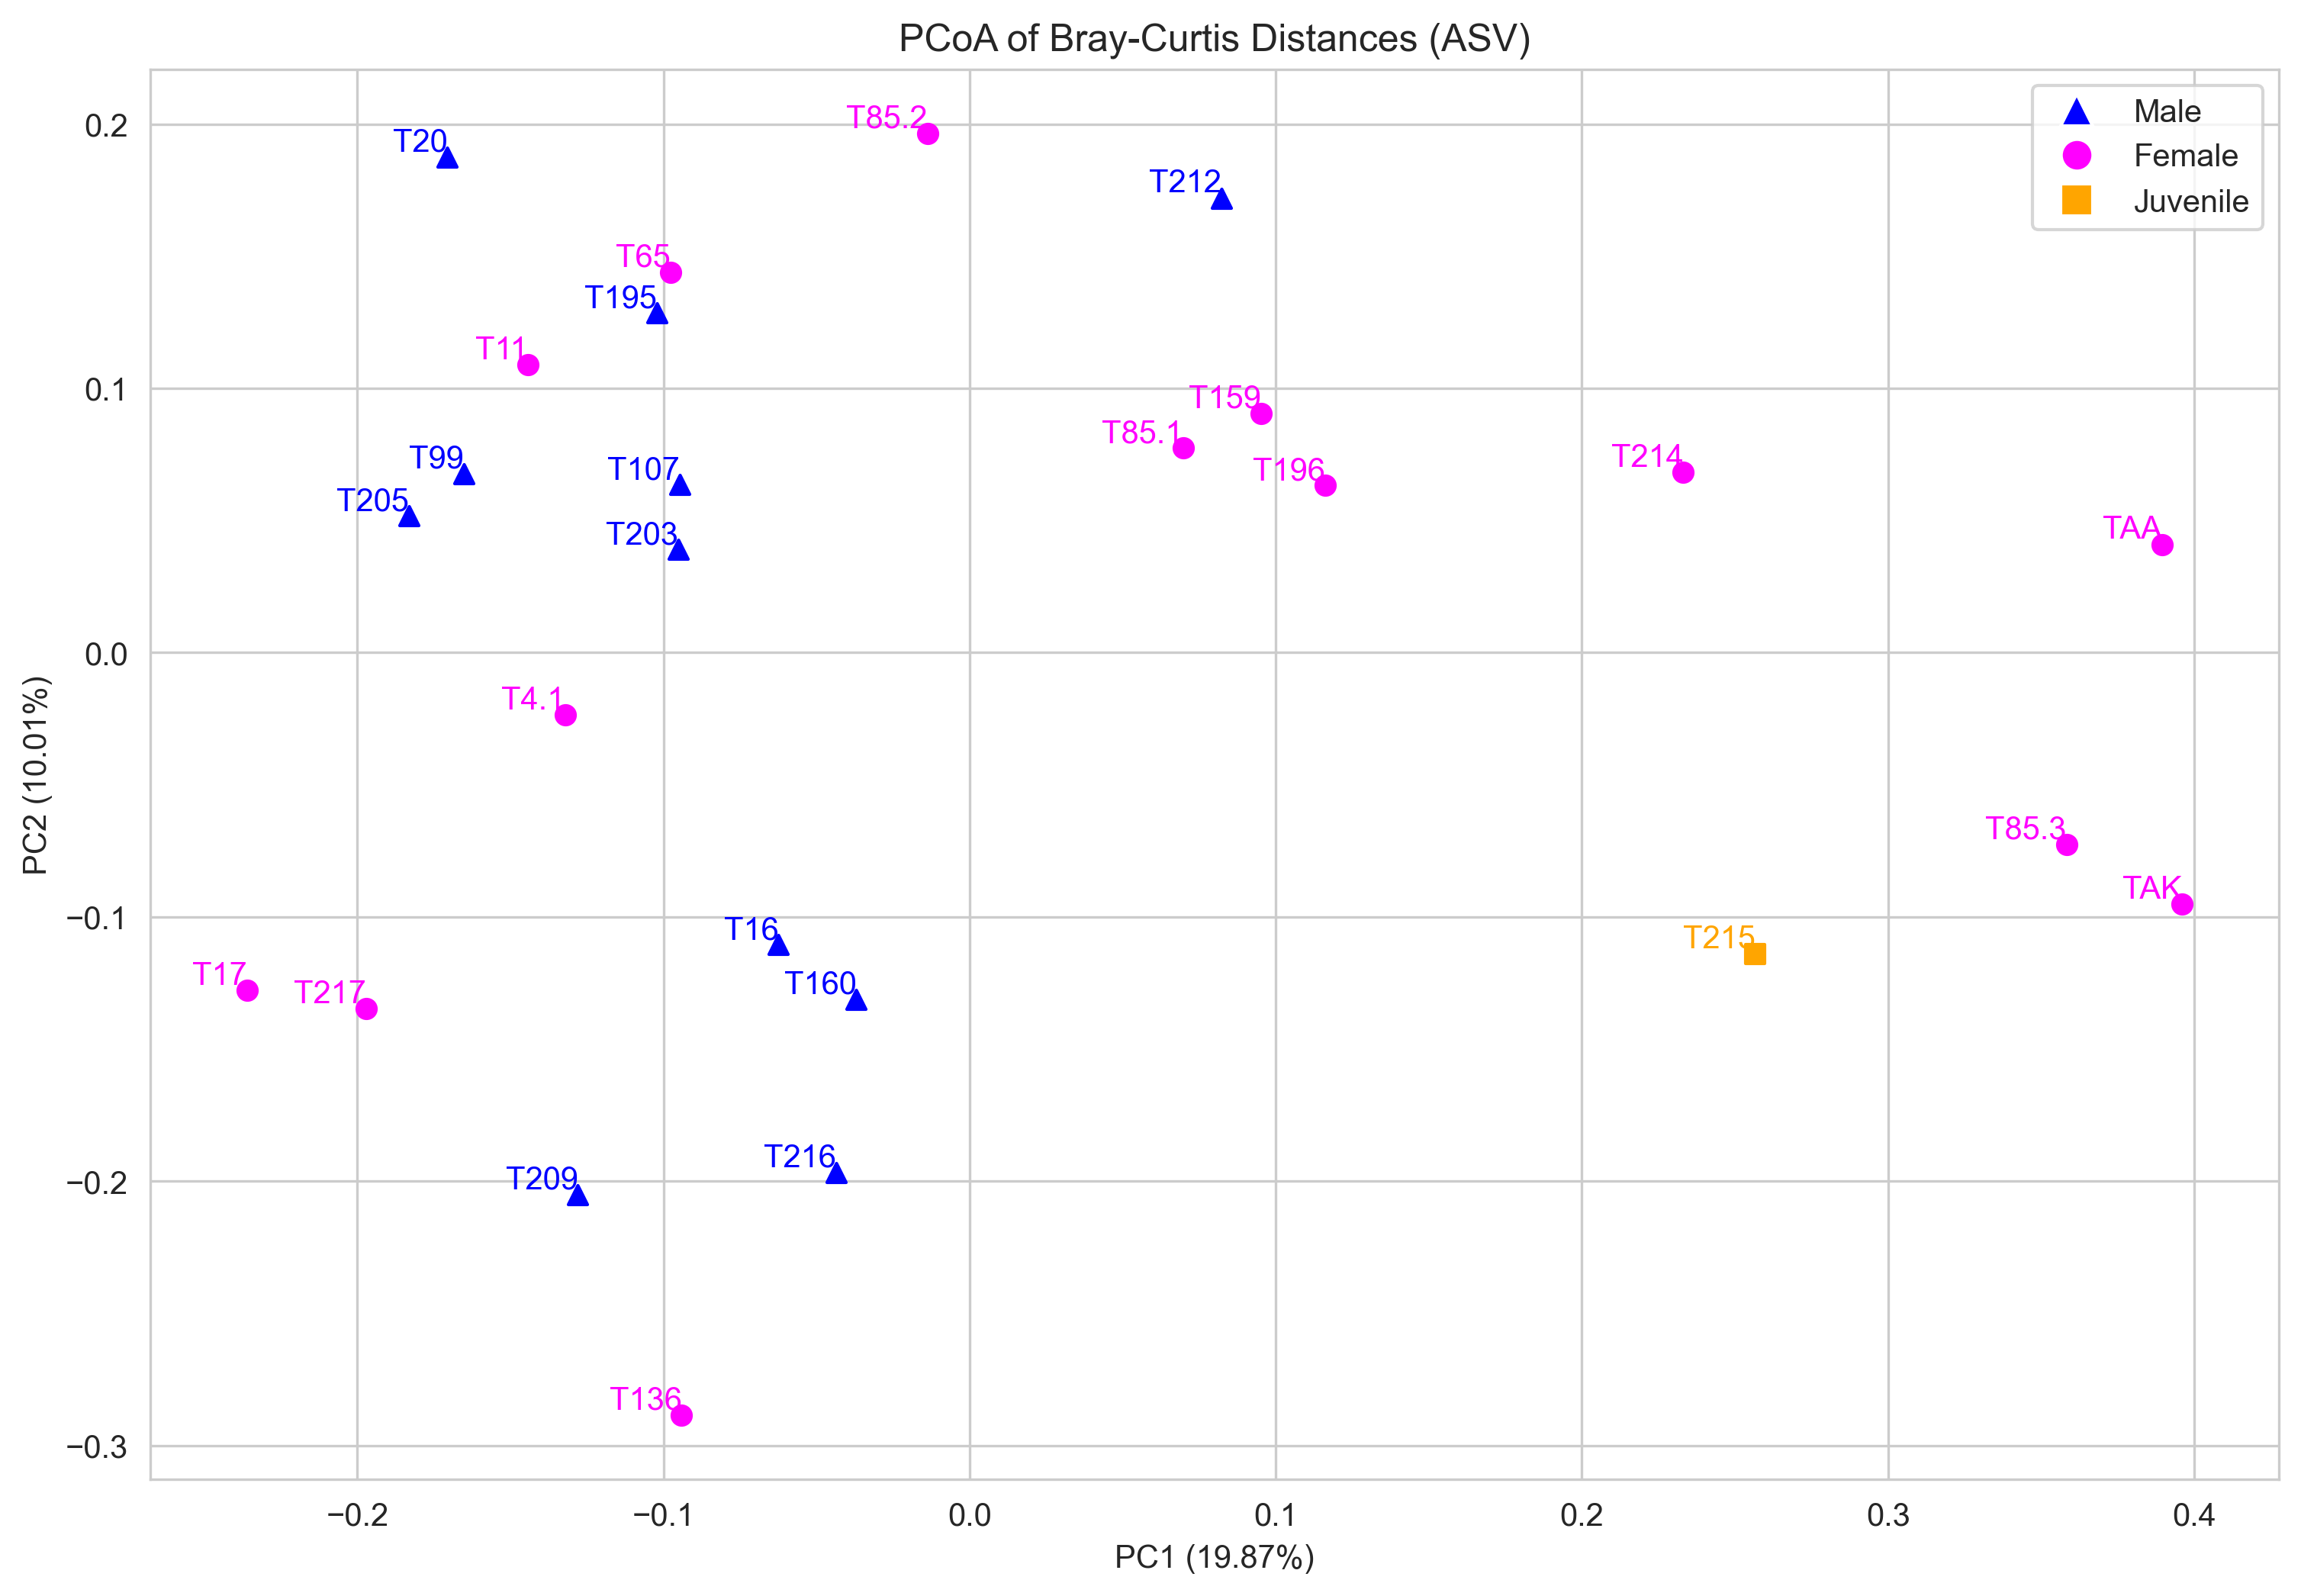

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Provided sample data with PC1 and PC2 coordinates
samples = {
    'Site': ['T4.1', 'T136', 'TAA', 'T215', 'T212', 'T65', 'T195', 'T16', 'T85.2', 'T209',
             'T20', 'T85.1', 'T216', 'T17', 'T107', 'T11', 'T214', 'T203', 'T205', 'T85.3',
             'T196', 'T217', 'T160', 'T99', 'TAK', 'T159'],
    'PC1': [0.132106749, 0.09404186, -0.389497192, -0.256575123, -0.082341681, 0.097590776,
            0.102169137, 0.062445352, 0.01378371, 0.12794519, 0.170559476, -0.069767919,
            0.043556109, 0.236005444, 0.094771858, 0.144339019, -0.233144172, 0.095194372,
            0.183110815, -0.358289828, -0.116054987, 0.196996673, 0.036989475, 0.165249179,
            -0.396046009, -0.095138285],
    'PC2': [-0.023656197, -0.288623279, 0.040953498, -0.113811878, 0.172045703, 0.143986013,
            0.128535497, -0.11048377, 0.196425248, -0.205157323, 0.18755697, 0.077453388,
            -0.196798057, -0.127880975, 0.063551467, 0.108902169, 0.068326168, 0.039048842,
            0.051683046, -0.072648901, 0.063318336, -0.134669679, -0.13113694, 0.067803811,
            -0.095244776, 0.09052162]
}

# Manually input metadata with corrected assignments
manual_metadata = {
    'Site': ['T4.1', 'T136', 'TAA', 'T215', 'T212', 'T65', 'T195', 'T16', 'T85.2', 'T209',
             'T20', 'T85.1', 'T216', 'T17', 'T107', 'T11', 'T214', 'T203', 'T205', 'T85.3',
             'T196', 'T217', 'T160', 'T99', 'TAK', 'T159'],
    'Sex': ['F', 'F', 'F', 'Juv.', 'M', 'F', 'M', 'M', 'F', 'M',
            'M', 'F', 'M', 'F', 'M', 'F', 'F', 'M', 'M', 'F',
            'F', 'F', 'M', 'M', 'F', 'F']
}

# Map 'Sex' to colors and markers
color_map = {'M': 'blue', 'F': 'magenta', 'Juv.': 'orange'}
marker_map = {'M': '^', 'F': 'o', 'Juv.': 's'}
colors = [color_map[sex] for sex in manual_metadata['Sex']]
markers = [marker_map[sex] for sex in manual_metadata['Sex']]

# Convert to numpy arrays for easier manipulation
samples_pc1 = -np.array(samples['PC1'])  # Negate the PC1 values
samples_pc2 = np.array(samples['PC2'])

# Proportion of variance explained by PC1 and PC2
pc1_variance = 19.87  # Replace with actual variance percentage for PC1
pc2_variance = 10.01  # Replace with actual variance percentage for PC2

# Plotting the PCoA with increased DPI
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)

# Plot samples as points with different markers for males, females, and juveniles
for i in range(len(samples_pc1)):
    ax.scatter(samples_pc1[i], samples_pc2[i], color=colors[i], marker=markers[i], label=f'{samples["Site"][i]} ({manual_metadata["Sex"][i]})')

# Annotate samples
for i, txt in enumerate(samples['Site']):
    ax.text(samples_pc1[i], samples_pc2[i], txt, color=colors[i], ha='right', va='bottom')

ax.set_xlabel(f'PC1 ({pc1_variance}%)')
ax.set_ylabel(f'PC2 ({pc2_variance}%)')
ax.set_title('PCoA of Bray-Curtis Distances (ASV)')
ax.grid(True)

# Create a legend for male, female, and juvenile
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='^', color='w', label='Male', markersize=10, markerfacecolor='blue'),
                   Line2D([0], [0], marker='o', color='w', label='Female', markersize=10, markerfacecolor='magenta'),
                   Line2D([0], [0], marker='s', color='w', label='Juvenile', markersize=10, markerfacecolor='orange')]
ax.legend(handles=legend_elements, loc='upper right')

# Save the plot as a .tif file with 300 dpi to the specified directory
save_path = '/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/biplotall.tif'
plt.savefig(save_path, format='tiff', dpi=300)


# Display the plot
plt.show()


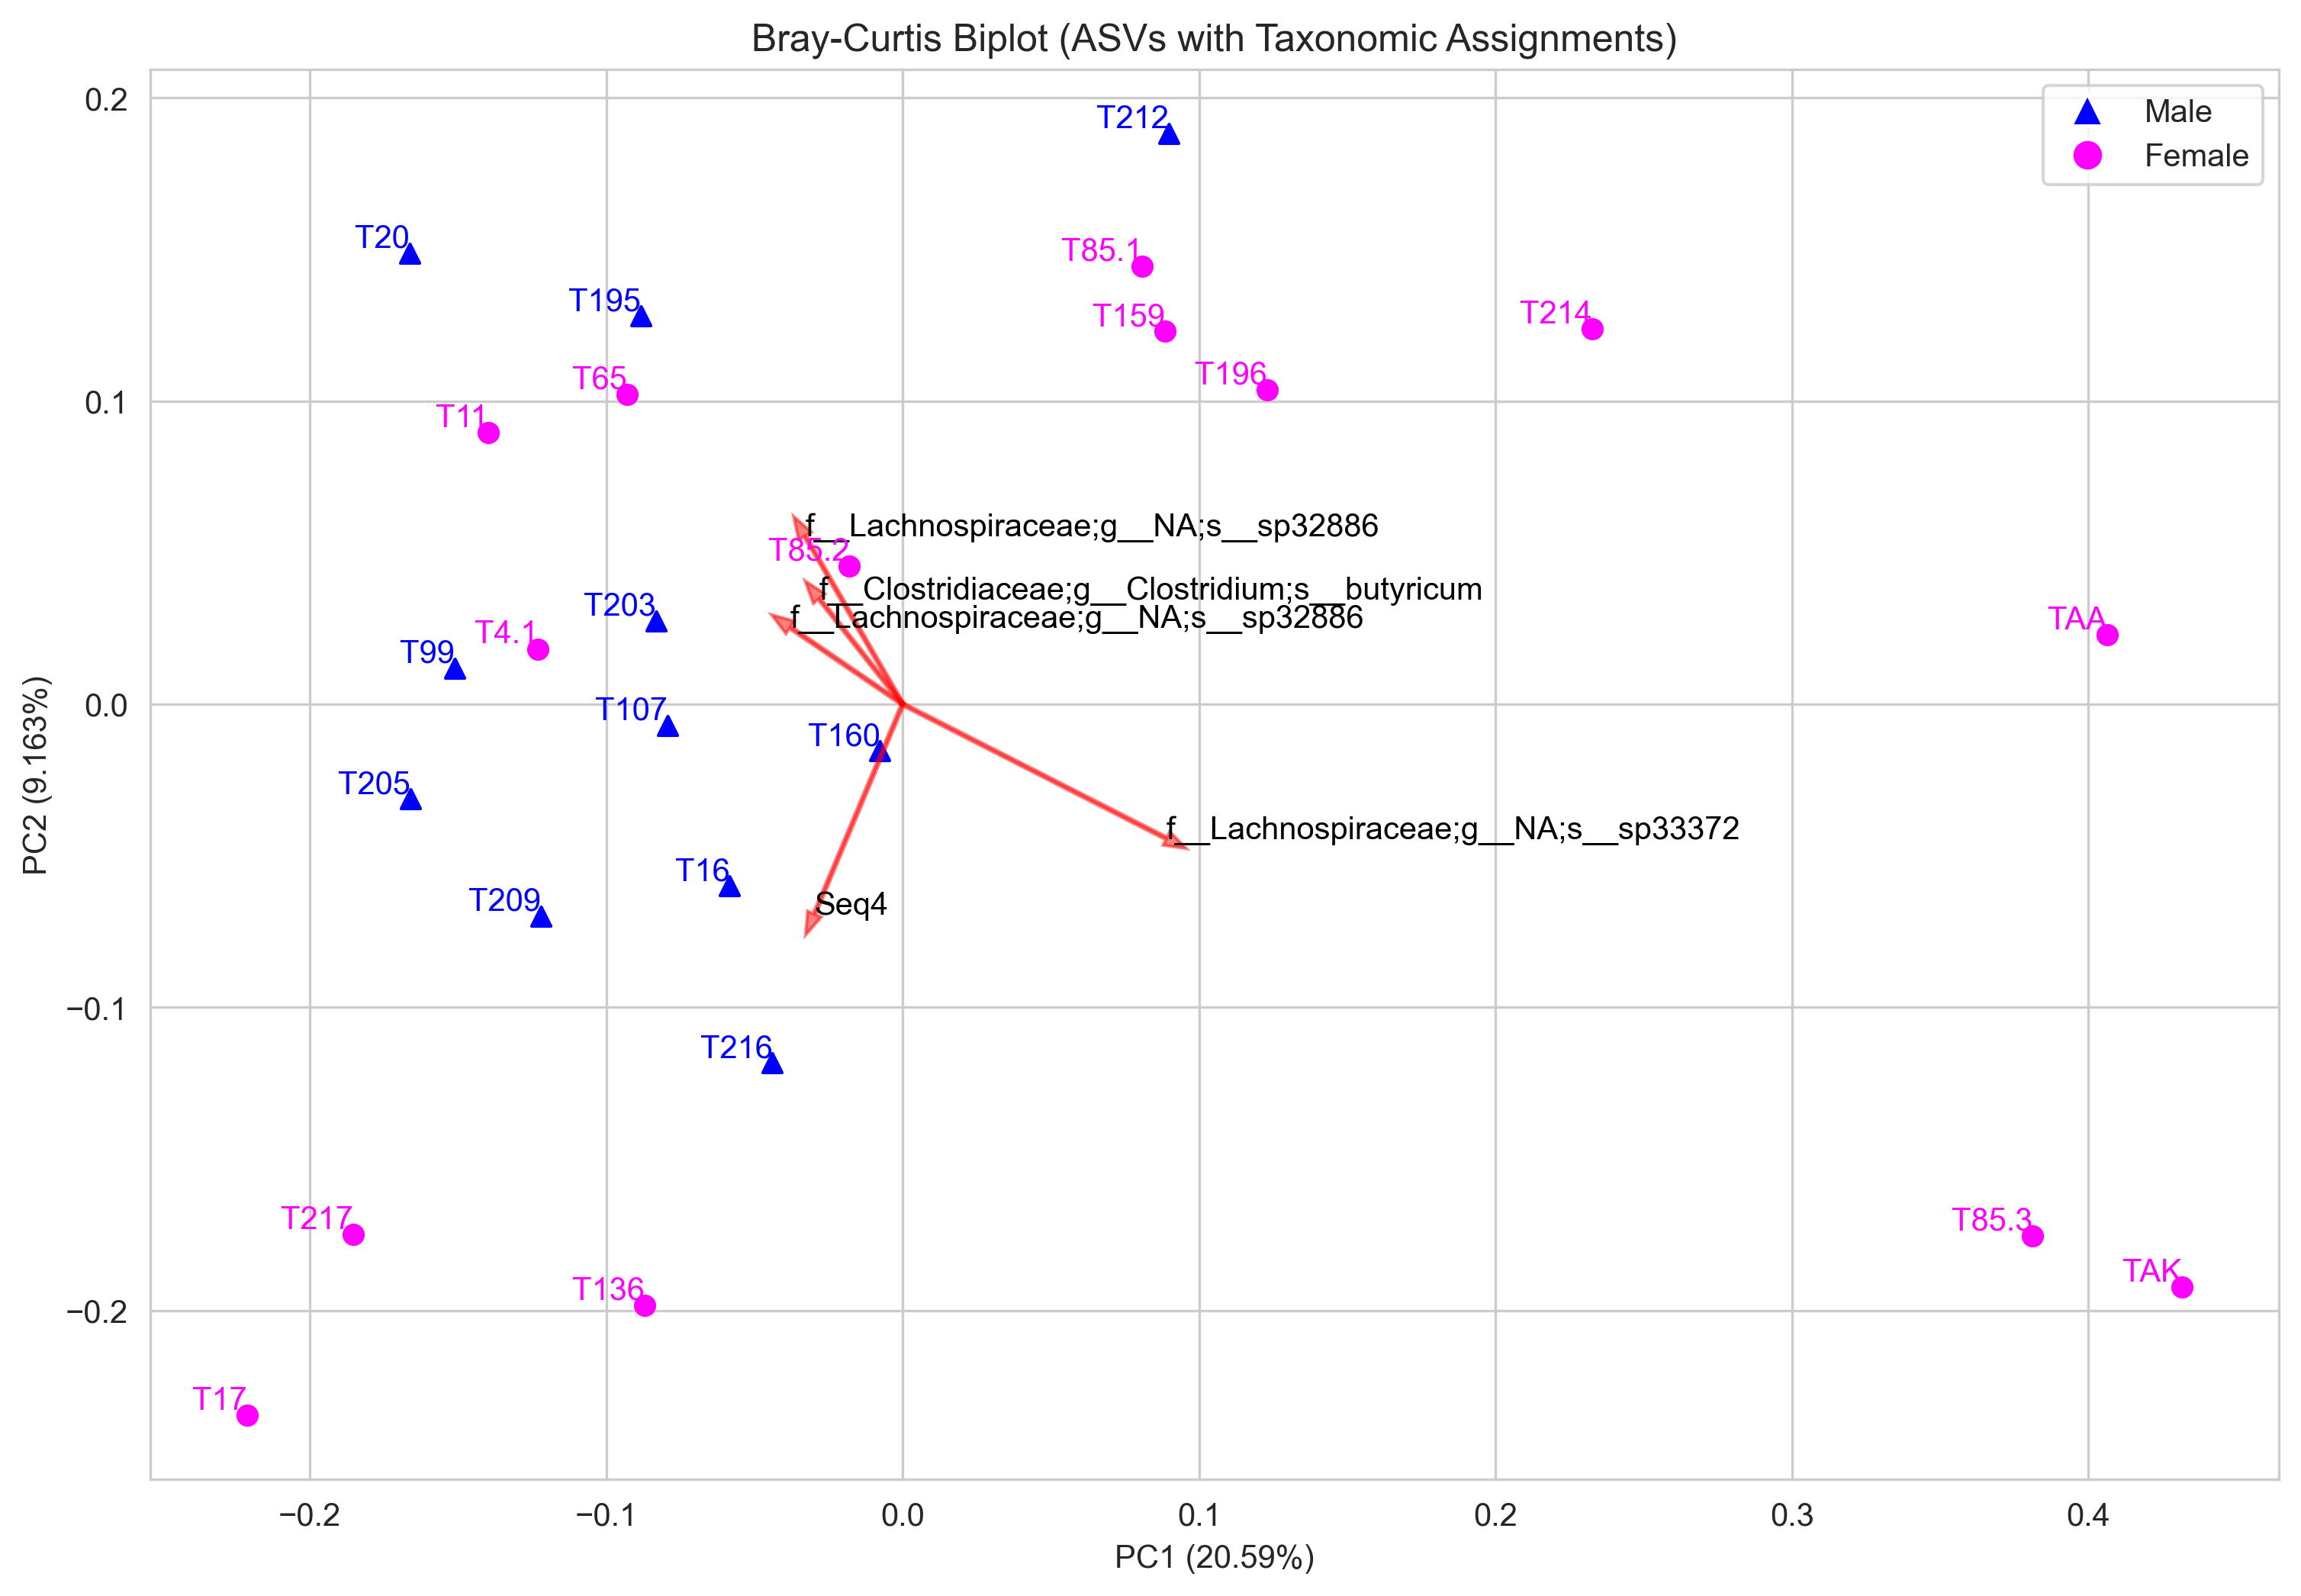

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Updated loadings with sequences 2, 3, 4, 8, and 13 as per user request
loadings = {
    'seq': ['f__Lachnospiraceae;g__NA;s__sp32886', 'f__Clostridiaceae;g__Clostridium;s__butyricum', 'Seq4', 'f__Lachnospiraceae;g__NA;s__sp33372', 'f__Lachnospiraceae;g__NA;s__sp32886'],
    'PC1': [-0.037968022, -0.028180197, -0.029762223, 0.088978431, -0.032933484],
    'PC2': [0.025320453, 0.034811183, -0.069247813, -0.044288783, 0.055472628]
}

# Provided sample data
samples = {
    'Site': ['T159', 'T136', 'T16', 'T17', 'T11', 'T205', 'T209', 'T99', 'T107', 'T203',
             'TAA', 'TAK', 'T160', 'T4.1', 'T20', 'T214', 'T217', 'T216', 'T212', 'T65',
             'T195', 'T196', 'T85.2', 'T85.3', 'T85.1'],
    'PC1': [0.088424459, -0.087083212, -0.058345497, -0.221195732, -0.139786938, -0.166067617,
            -0.122075271, -0.15120632, -0.079338291, -0.083259956, 0.406312983, 0.431643148,
            -0.007650314, -0.123059654, -0.16628776, 0.232694381, -0.185451647, -0.043950995,
            0.089698157, -0.092910591, -0.088239354, 0.123061833, -0.017942797, 0.381130771,
            0.080886216],
    'PC2': [0.123017248, -0.198356088, -0.060009363, -0.234618556, 0.089494945, -0.031308774,
            -0.069964296, 0.011918052, -0.007022335, 0.02740614, 0.022982969, -0.192407168,
            -0.015448889, 0.018227141, 0.148751078, 0.123763591, -0.174969254, -0.118402238,
            0.188217637, 0.102259932, 0.128004995, 0.103811336, 0.045578899, -0.175433473,
            0.144506471]
}

# Manually input metadata with correct assignments
manual_metadata = {
    'Site': ['T159', 'T136', 'T16', 'T17', 'T11', 'T205', 'T209', 'T99', 'T107', 'T203',
             'TAA', 'TAK', 'T160', 'T4.1', 'T20', 'T214', 'T217', 'T216', 'T212', 'T65',
             'T195', 'T196', 'T85.2', 'T85.3', 'T85.1'],
    'Sex': ['F', 'F', 'M', 'F', 'F', 'M', 'M', 'M', 'M', 'M',
            'F', 'F', 'M', 'F', 'M', 'F', 'F', 'M', 'M', 'F',
            'M', 'F', 'F', 'F', 'F']
}

# Map 'Sex' to colors and markers
color_map = {'M': 'blue', 'F': 'magenta', 'Ukn': 'orange'}
marker_map = {'M': '^', 'F': 'o', 'Ukn': 's'}
colors = [color_map[sex] for sex in manual_metadata['Sex']]
markers = [marker_map[sex] for sex in manual_metadata['Sex']]

# Convert to numpy arrays for easier manipulation
loadings_pc1 = np.array(loadings['PC1'])
loadings_pc2 = np.array(loadings['PC2'])
samples_pc1 = np.array(samples['PC1'])
samples_pc2 = np.array(samples['PC2'])

# Given percentage variance for each PC
pc1_variance = 20.59  # PC1 variance percentage
pc2_variance = 9.163  # PC2 variance percentage

# Plotting the biplot with increased DPI
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)

# Plot samples as points with different markers for males and females
for i in range(len(samples_pc1)):
    ax.scatter(samples_pc1[i], samples_pc2[i], color=colors[i], marker=markers[i], label=f'{samples["Site"][i]} ({manual_metadata["Sex"][i]})')

# Plot loadings as vectors
for i, txt in enumerate(loadings['seq']):
    ax.arrow(0, 0, loadings_pc1[i], loadings_pc2[i], color='red', alpha=0.5, head_width=0.005)
    ax.text(loadings_pc1[i], loadings_pc2[i], txt, color='black')

# Annotate samples
for i, txt in enumerate(samples['Site']):
    ax.text(samples_pc1[i], samples_pc2[i], txt, color=colors[i], ha='right', va='bottom')

ax.set_xlabel(f'PC1 ({pc1_variance}%)')
ax.set_ylabel(f'PC2 ({pc2_variance}%)')
ax.set_title('Bray-Curtis Biplot (ASVs with Taxonomic Assignments)')
ax.grid(True)

# Create a legend for male and female
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='^', color='w', label='Male', markersize=10, markerfacecolor='blue'),
                   Line2D([0], [0], marker='o', color='w', label='Female', markersize=10, markerfacecolor='magenta')]
ax.legend(handles=legend_elements, loc='upper right')


# Save the plot as a .tif file with 300 dpi
# plt.savefig('biplot.tif', format='tiff', dpi=300)
# Save the plot as a .tif file with 300 dpi to the specified directory
save_path = '/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/biplot.tif'
plt.savefig(save_path, format='tiff', dpi=300)

# Display the plot
plt.show()
